# Projet Final Python : Eloy Henri - Tissot Maud - Pouxviel Aurelien

### LIBRAIRIES

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import numpy as np
import pylab
import json
import random as rd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
 #pip install --user --upgrade tensorflow (mais pas perso a pas marché) donc tuto en dessous
## https://www.youtube.com/watch?v=5Ym-dOS9ssA&ab_channel=AladdinPersson tuto pour installer tensorflow

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import metrics 
from sklearn.metrics import log_loss, jaccard_score, f1_score, mean_squared_error,mean_absolute_error,r2_score,explained_variance_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score, roc_curve,auc

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score,validation_curve 
from sklearn.model_selection import GridSearchCV                          
from sklearn.model_selection import learning_curve 

from sklearn.decomposition import PCA

from sklearn.preprocessing import OneHotEncoder

from scipy import stats
from scipy.stats import chisquare, chi2_contingency, chi2
from scipy.stats import pearsonr
import scipy.optimize as opt

import warnings
warnings.filterwarnings('ignore')

#### LOAD DU DATASET

In [2]:
shopset = pd.read_csv(r"online_shoppers_intention.csv",sep = ",")

# SOMMAIRE

###  [I - Data PreProcessing](#c1)
   * [Description de la base de données et des attributs](#s1.1)
   * [Transformation des données](#s1.2)
   * [Division du dataset](#s1.3)
  
    
### [II -  Analyse des données](#c2)
- [Analyse des correlations](#s2.1)
- [Analyses Bivariées / Multivariées](#s2.2)


### [III - Modelisation de l'intention d'achat : Machine Learning + Deep Learning](#c3)
- [Test de diffèrents modèles et interpretation](#s3.1)
- [Comparaison des modèles](#s3.2)
- [Deep Learning](#s3.3)

    
### [IV - Transformation du modèle en API](#c4)


# I - Data PreProcessing  <a class="anchor" id="c1"></a>


## I - 1) Description de la base de données et des attributs  <a class="anchor" id="s1.1"></a>

L'ensemble de données se compose de vecteurs de caractéristiques appartenant à 12 330 sessions.  

L'ensemble de données a été formé de manière à ce que chaque session appartienne à un utilisateur différent sur une période d'un an afin d'éviter toute tendance à une campagne, une journée spéciale, un profil utilisateur ou une période spécifique.

In [3]:
shopset.shape

(12330, 18)

In [4]:
shopset.head(15)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [5]:
shopset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# check des nulles
nulles = shopset.isnull().sum()
print('Nombre de valeurs nulles:', nulles.sum())

Nombre de valeurs nulles: 0


### Liste des attributs et statistiques associées

10 categories numeriques et 8 catégoriques, il n'y a aucune valeurs nulles

- Administrative: Nombre de page de type "administratif" visité par l'utilisateur.
- Informational
- ProductRelated  


- Administrative_Duration: Temps passé par l'utilisateur sur une page de type administartif.
- Informational_Duration
- ProductRelated_Duration  

#### Calculés par Google Analytics :
- BounceRates: Le taux de rebond se focalise sur la consultation d’une seule page et mesure le pourcentage de visiteurs qui sont arrivés sur site web et sont repartis sans consulter aucune autre page de ce site et sans interagir avec le site.
- ExitRates: Le taux d’Exit mesure le ratio entre le nombre de visiteurs ayant consulté une page et qui quitte le site depuis cette dernière et le nombre totale de vues de cette page. Il nous indique donc la propension d’une page à faire quitter un site et permet donc d’analyser les visites entrantes et sortantes d’une page d’un site.

La formule est :
TAUX DE SORTIE = Nombre de visiteurs sorties depuis cette page / Nombre de vues total de la page

<img src="rebond.jpg" width="600" height="500">

<img src="exit.jpg" width="600" height="500">

- PageValues: C'est la valeur d'une page, calculée par Google Analytics.


Cette statistique correspond à la valeur moyenne d'une page qu'un utilisateur a visitée avant d'accéder à la page d'objectif ou d'effectuer une transaction e-commerce (ou les deux). Elle a pour but de vous aider à identifier la page de votre site qui a contribué le plus au chiffre d'affaires généré par celui-ci. Si la page n'a été impliquée dans aucune transaction e-commerce pour votre site Web, la valeur de cette page est de 0 $ 

#### Formule : 

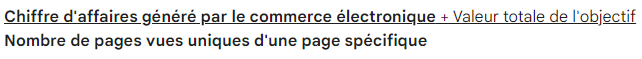

#### Exemple : 

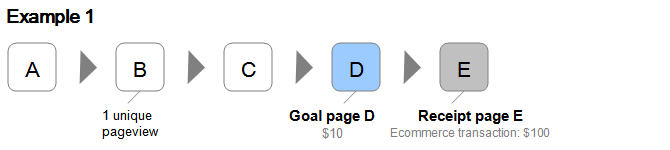

- On souhaite obtenir la pageValue de la page B, et on connait le schéma ci-dessus
- Imaginons que la page d'objectif (D) est définit à 10 €
- Un utilisateur achète pour 100 € (page confirmation d'achat E)
- La page B enregistre 1 vue unique
- Calcul : 100(CA e-commerce) + 10(objectif) / 1 (nb de vues unique pour la page) = 110 €

#### Autre variables :


- SpecialDay: Represente la proximité du jour de la recherche à une date spéciale ou aux vacances(fête des mères, Saint Valentin...) pour lesquels la transaction a plus de chance d'être finalisée.
- Month : Contient le mois
- Weekend: Booléen qui indique si la session est effectuée en weekend ou non.
- Region: Region ou l'utilisateur à effectué sa recherche
 
 
- OperatingSystems: Represente le système d'opération sur lequel l'utilisateur était quand il a visité un site web
- Browser: idem avec le naviguateur
- TrafficType: Represente le traffic qui categorise l'utilisateur (visiteurs qui tapent l'URL directement, lien par documents, navigation privée etc)
   
   
- VisitorType: String qui indique si c'est un 'New Visitor, Returning Visitor, ou Other'.
    
    
- Revenue: Valeur booléenne qui indique si oui ou non l'utilisateur à complété son achat

In [7]:
shopset.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


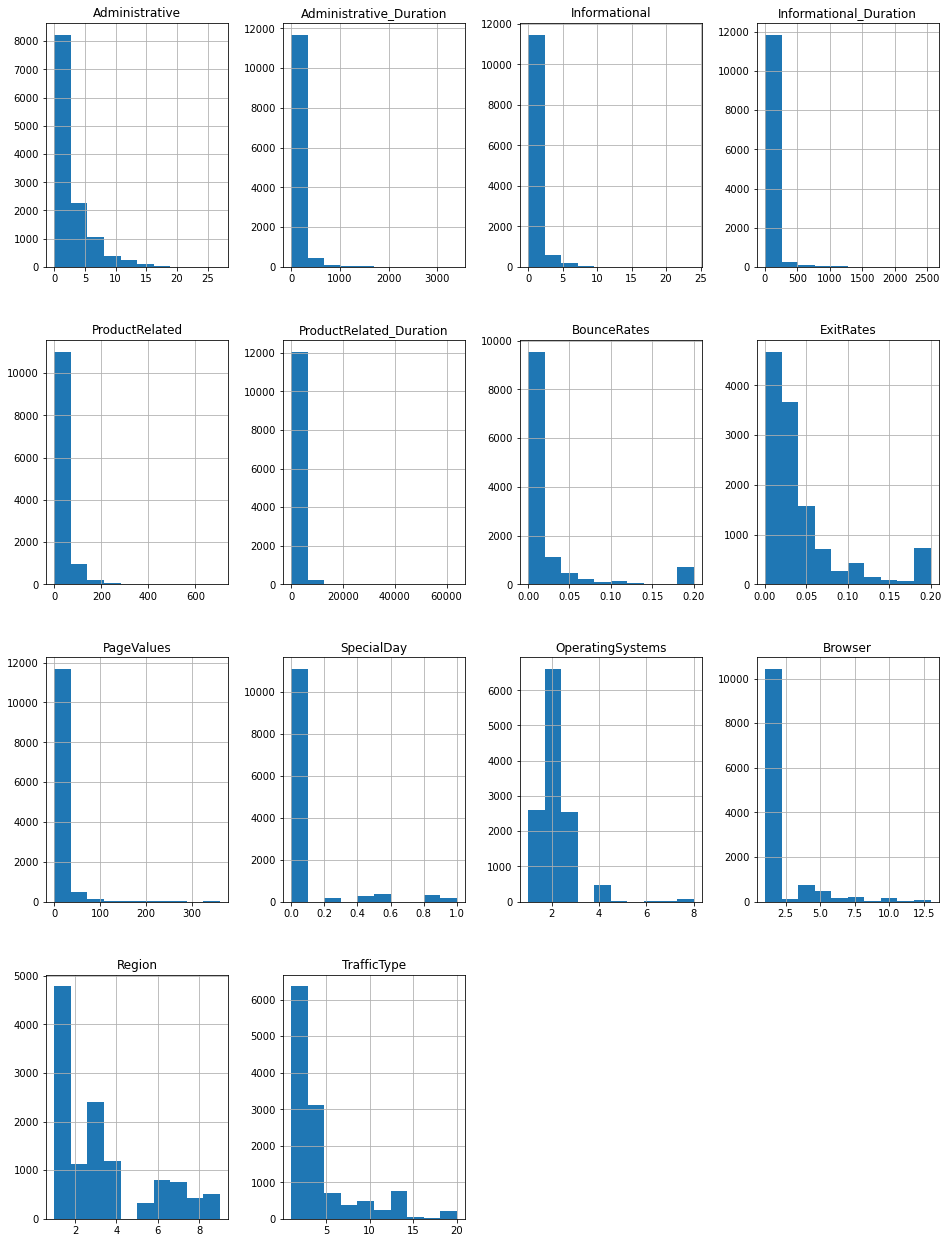

In [8]:
shopset.select_dtypes(include=['int64', 'float64']).hist(figsize=(16,22));

### - Revenue : Combien de sessions ont générées un achat ?

In [9]:
shopset["Revenue"].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

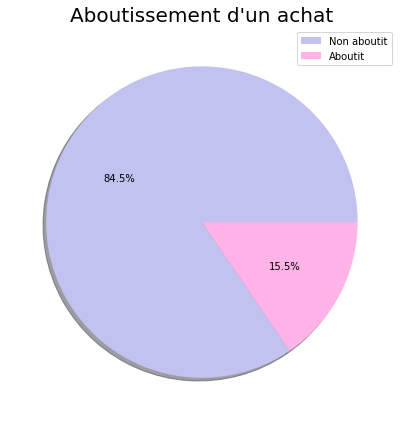

In [10]:
RevenueInfo=shopset.groupby('Revenue')['Revenue'].count()
RevenueInfo = pd.DataFrame({'Revenue':RevenueInfo.index, 'Count':RevenueInfo.values})

plt.figure(figsize = (6,6))
colors = ['#c2c2f0','#ffb3e6']
plt.pie(RevenueInfo['Count'],
        colors = colors, 
        autopct='%1.1f%%',
        shadow=True);

plt.title("Aboutissement d'un achat",fontsize = 20);
plt.legend(["Non aboutit","Aboutit"]);
plt.tight_layout()

Interpretation :
- 15.5% des visitent mènent à un achat

### - Page types : Quels sont les types de page les plus visités ?

In [11]:
df4=pd.DataFrame(shopset[["Administrative","Informational",'ProductRelated']].sum(),columns=["sum1"])

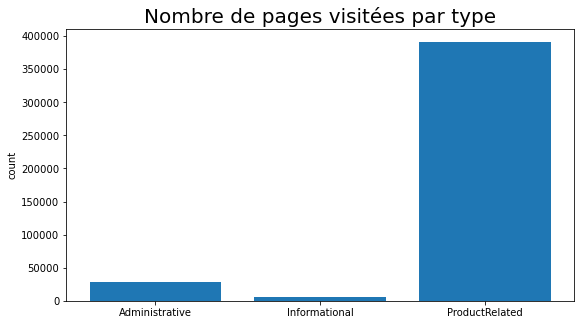

In [12]:
plt.rcParams['figure.figsize'] = (20,5)
plt.subplot(1, 2, 2)
plt.bar(df4.index,df4.sum1)
plt.title('Nombre de pages visitées par type', fontsize = 20)
plt.ylabel('count')

plt.show()

Interpretation:
- Sur l'ensemble des sessions il y a eu envrion 400 000 recherche reliées à un produit pour moins de 50 000 recherches administratives et d'information
- On achete souvent des produits sur des sites destinés à l'achats

### - Durations : Quelle est la durée moyenne passée sur une page selon son type

In [13]:
df5=pd.DataFrame(shopset[["Administrative_Duration","Informational_Duration",'ProductRelated_Duration']].mean(),columns=["moy"])

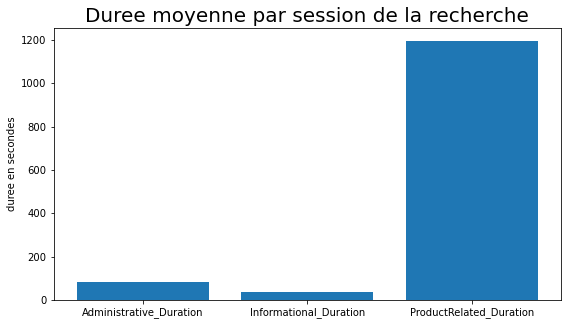

In [14]:
plt.rcParams['figure.figsize'] = (20,5)
plt.subplot(1, 2, 2)
plt.bar(df5.index,df5.moy)
plt.title('Duree moyenne par session de la recherche', fontsize = 20)
plt.ylabel('duree en secondes')

plt.show()

Interpretation:
- La durée moyenne de chaque sessions selon les types de pages varient enormément
- On voit que c'est toujours pour un produit que la durée moyenne par session est le plus élevée

### - Bounce Rates



In [15]:
shopset['BounceRates'].value_counts()

0.000000    5518
0.200000     700
0.066667     134
0.028571     115
0.050000     113
            ... 
0.023457       1
0.003901       1
0.005074       1
0.016735       1
0.007356       1
Name: BounceRates, Length: 1872, dtype: int64

In [16]:
df1=shopset.groupby("BounceRates").count().sort_values(by="Administrative",ascending=False)

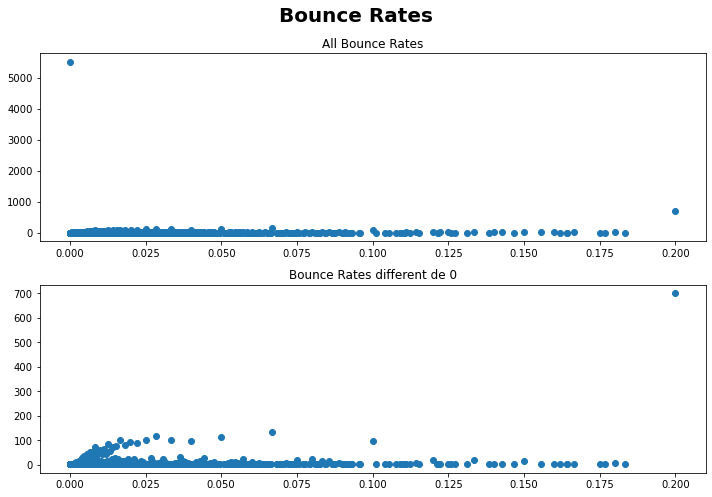

In [17]:
fig, axes = plt.subplots(2,1,figsize=(10,7))
titles=["All Bounce Rates","Bounce Rates different de 0"]
ax=axes.flat
x=[]

ax[0].scatter(df1.index,df1["Administrative"]);
ax[1].scatter(df1.iloc[1:].index,df1["Administrative"].iloc[1:]);


for i, ax in enumerate(axes.flat):
    ax.set_title(titles[i])

fig.suptitle("Bounce Rates",
            fontsize=20,
            fontweight="semibold")

plt.tight_layout()
plt.show()

Interpretation: 
- Valeurs entre 0 et 0.2
- Il y a plus de 5000 valeurs nulles pour bounces rates et plus de 700 valeurs égales au max c'est à dire 0.2
- Il y a beaucoup de valeurs dont l'indice est concentré entre 0 et 0.1

### - Exit Rates

In [18]:
shopset['ExitRates'].value_counts()

0.200000    710
0.100000    338
0.050000    329
0.033333    291
0.066667    267
           ... 
0.025325      1
0.020586      1
0.084444      1
0.055882      1
0.010710      1
Name: ExitRates, Length: 4777, dtype: int64

In [19]:
df2=shopset.groupby("ExitRates").count().sort_values(by="ExitRates",ascending=False)

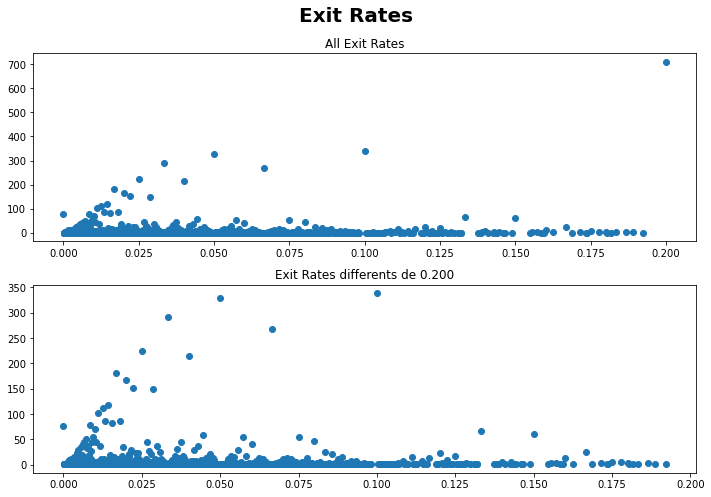

In [20]:
fig, axes = plt.subplots(2,1,figsize=(10,7))
titles=["All Exit Rates","Exit Rates differents de 0.200"]
ax=axes.flat
x=[]

ax[0].scatter(df2.index,df2["Administrative"]);
ax[1].scatter(df2.iloc[1:].index,df2["Administrative"].iloc[1:]);


for i, ax in enumerate(axes.flat):
    ax.set_title(titles[i])

fig.suptitle("Exit Rates",
            fontsize=20,
            fontweight="semibold")

plt.tight_layout()
plt.show()

Interpretation: 
- Exit Rates même plage de valeurs que Bounce rates
- Il y a peu de valeurs nulles comparé aux Bounce Rates
- La pente semble plus forte que pour les Bounce Rates mais moins marqué avec des valeurs distribuées plus aléatoirements.


### - Page Values

In [21]:
shopset['PageValues'].value_counts()

0.000000     9600
53.988000       6
42.293068       3
40.278152       2
12.558857       2
             ... 
1.625051        1
20.157102       1
8.191923        1
12.587222       1
30.203577       1
Name: PageValues, Length: 2704, dtype: int64

In [22]:
PageValuesInfo=shopset.groupby('PageValues')['PageValues'].count()
PageValuesInfo = pd.DataFrame({'PageValues':PageValuesInfo.index, 'Count':PageValuesInfo.values})
PageValuesInfo

,PageValues,Count
0,0.000000,9600
1,0.038035,1
2,0.067050,1
3,0.093547,1
4,0.098621,1
...,...,...
2699,261.491286,1
2700,270.784693,1
2701,287.953793,1
2702,360.953384,1


Text(0.5, 1.0, 'Pages values - Densité')

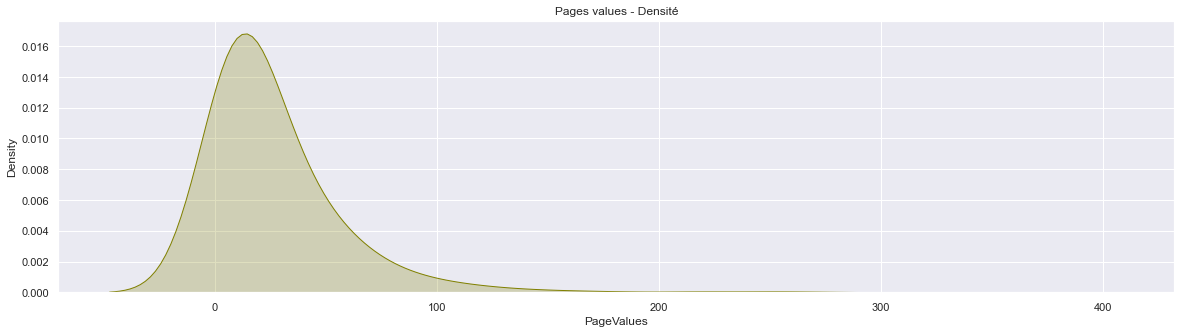

In [23]:
sns.set(style="darkgrid")
sns.kdeplot(PageValuesInfo['PageValues'],shade=True, bw_method=0.5, color="olive")
plt.title('Pages values - Densité')

- On regarde que sur les sessions qui ont généré un achat

Text(0.5, 1.0, "Densité de pageValue sur sessions d'achat")

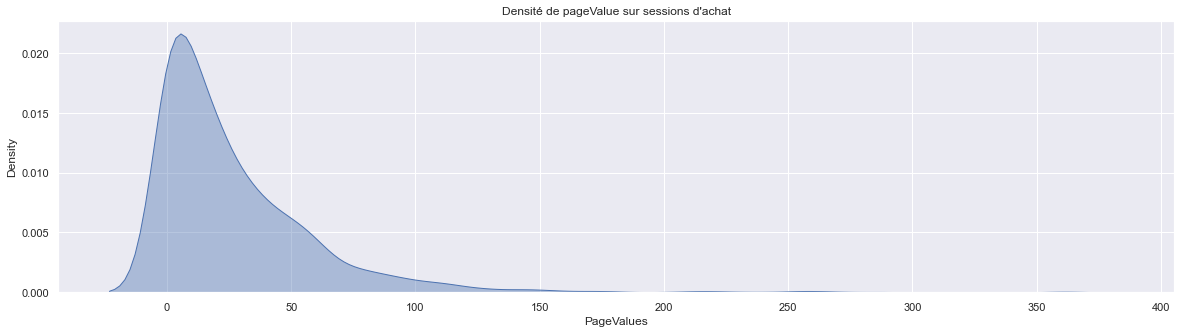

In [24]:
sns.kdeplot(data=shopset.loc[(shopset['Revenue']==1)], x="PageValues", fill=True, common_norm=False, alpha=0.4,palette='husl')
plt.title("Densité de pageValue sur sessions d'achat")

- On observe que sur les 2 graphiques, les valeurs sont proches de zero
- On étudie donc si même à 0, pageValue peut mener à un achat

#### On créer donc une variable binaire PageValueBool qui prend soit 0 soit 1

In [25]:
dftest = shopset.copy()
dftest['PageValueBool'] = np.where((dftest['PageValues']==0),0,1)

Text(0.5, 1.0, "Proportion d'achats ou non selon la nouvelle variable PageValueBool")

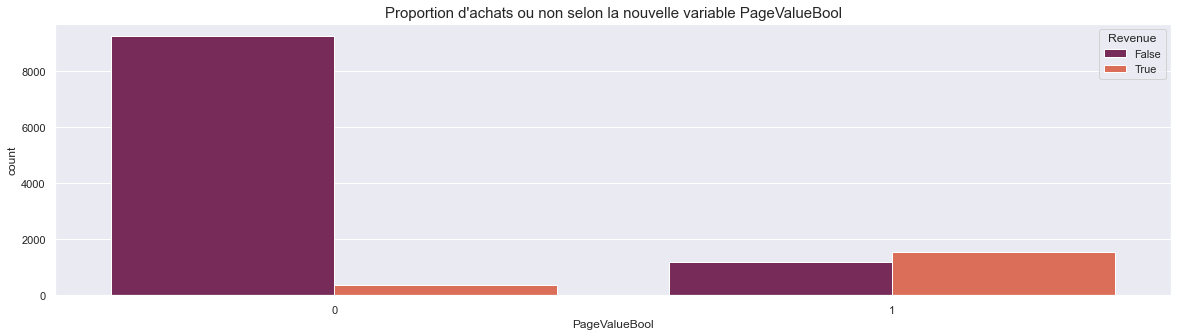

In [26]:
ax = sns.countplot(x="PageValueBool", data=dftest, 
              palette='rocket', hue="Revenue")
plt.title("Proportion d'achats ou non selon la nouvelle variable PageValueBool",fontsize=15)

- On observe que il y a quand même des achats avec PageValueBool de zéro, calculons combien

In [27]:
dftest['PageValueBool'].value_counts()

0    9600
1    2730
Name: PageValueBool, dtype: int64

In [28]:
ratio1 = (len(dftest.loc[(dftest['PageValueBool']==0)& (dftest['Revenue']==1)]) / len(dftest.loc[(dftest['PageValueBool']==0)]))
print('Avec PagevalueBool = 0, il y a ',round(ratio1*100,2)," % d'achat")

ratio2 = (len(dftest.loc[(dftest['PageValueBool']==1)& (dftest['Revenue']==1)]) / len(dftest.loc[(dftest['PageValueBool']==1)]))
print("Avec PagevalueBool = 1, il y a ",round(ratio2*100,2)," % d'achat")

Avec PagevalueBool = 0, il y a  3.85  % d'achat
Avec PagevalueBool = 1, il y a  56.34  % d'achat


- Conclusion : Des pages values nulle n'engendrent que très peu d'achat, et la plus part des achats se font entre 20 et 50.

### - Special Day : A quelle periode les utilisiteurs visitent un site?

In [29]:
shopset['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

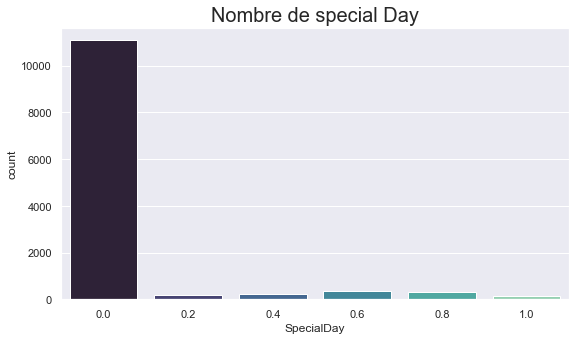

In [30]:
plt.rcParams['figure.figsize'] = (20,5)
plt.subplot(1, 2, 2)
sns.countplot(shopset['SpecialDay'], palette = 'mako')
plt.title('Nombre de special Day', fontsize = 20)
plt.ylabel('count')

plt.show()

Interpretation: La majorité des achats se font avec un spécial day de 0.

### - Mois : Quand-est-ce que les utilisateurs visitent le site ?

In [31]:
shopset['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

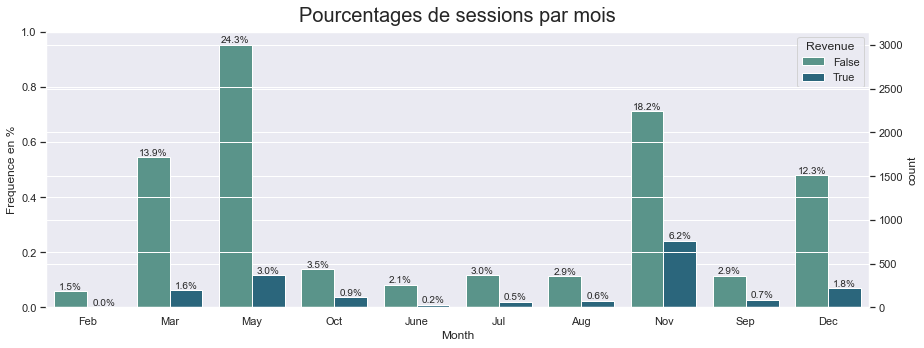

In [32]:
fig, ax = plt.subplots(figsize=(13,5))
ax = sns.countplot(x=shopset['Month'],hue='Revenue', data=shopset, palette='crest')

ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequence en %')

for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/len(shopset)), (x.mean(), y), 
                ha='center', va='bottom', fontsize=10) # set the alignment of the text

plt.title('Pourcentages de sessions par mois', fontsize = 20,pad=10)     
plt.tight_layout()
plt.show()

Intepretation :
- Janvier et avril n'apparaissent pas dans le dataset. Aucune recherche n'a été recensée.
- Les mois de mai et de novembre sont les plus frequentés à eux deux ils representent 50% des recherches.
- Avec mars et decembre ce chiffre monte à 75%.

### - Week End : A quelle periode de la semaine les utilisateurs font-ils des recherches? 

In [33]:
shopset["Weekend"].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

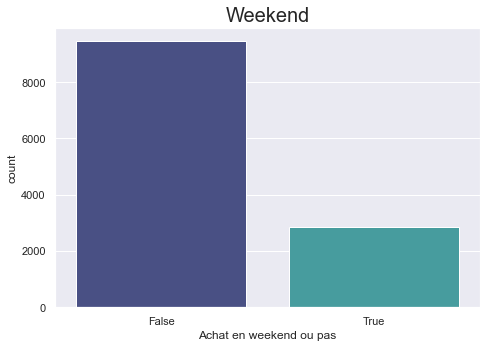

In [34]:
plt.rcParams['figure.figsize'] = (13,5)
plt.subplot(1, 2, 2)
sns.countplot(shopset['Weekend'], palette = 'mako')
plt.title('Weekend', fontsize = 20)
plt.xlabel('Achat en weekend ou pas')
plt.ylabel('count')

plt.tight_layout()
plt.show()

- On observe que pres de 3000 achats se font en weekend, soit 23% de chance d'acheter en weekend.

### - Operating Systems : Quels sont les systèmes d'opérations des utilisateurs?

In [35]:
shopset['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

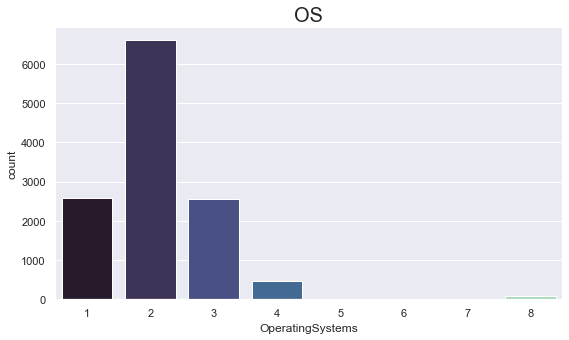

In [36]:
plt.rcParams['figure.figsize'] = (20,5)
plt.subplot(1, 2, 2)
sns.countplot(shopset['OperatingSystems'], palette = 'mako')
plt.title('OS', fontsize = 20)
plt.ylabel('count')

plt.show()

- On observe que l'OS 2 est le plus fréquent

### - Region : D'ou viennent les utilisateurs ?

In [37]:
shopset['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

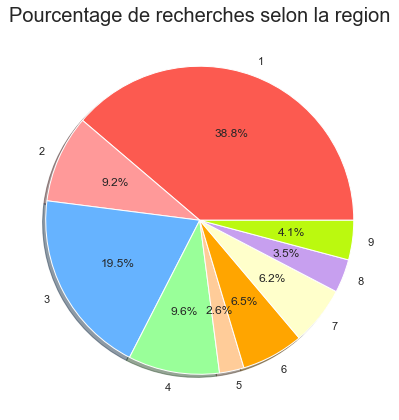

In [38]:
RegionInfo=shopset.groupby('Region')['Region'].count()
RegionInfo = pd.DataFrame({'Region':RegionInfo.index, 'Count':RegionInfo.values})

plt.figure(figsize = (6,6))
colors = ['#fc5a50','#ff9999','#66b3ff','#99ff99','#ffcc99','#ffa500','#ffffcb','#c79fef','#bbf90f']
plt.pie(RegionInfo['Count'],
        colors = colors, 
        labels = RegionInfo['Region'],
        autopct='%1.1f%%',
        shadow=True);

plt.title('Pourcentage de recherches selon la region',fontsize=20);
plt.tight_layout()

Interpretation:
- 2 principales regions 1 et 3
- Puis repartition à peu près égale entre les autres regions

### -Traffic Type

In [39]:
shopset['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

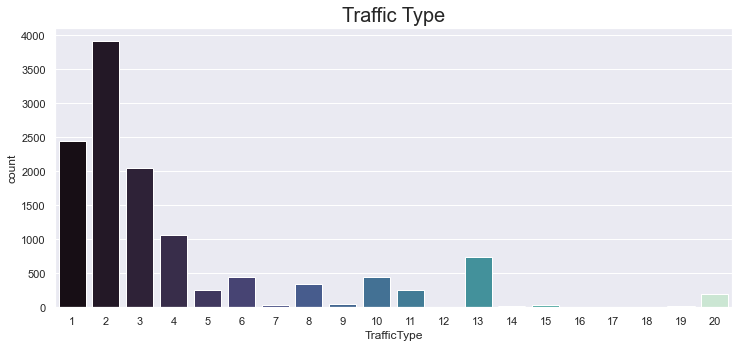

In [40]:
plt.rcParams['figure.figsize'] = (20,5)
plt.subplot(1, 2, 2)
sns.countplot(shopset['TrafficType'], palette = 'mako')
plt.title('Traffic Type', fontsize = 20)
plt.ylabel('count')

plt.tight_layout()
plt.show()

- le traffic type 2 est le plus fréquent

### - Visitor Type : Comment sont caractérisés les utilisateurs?

In [41]:
shopset['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

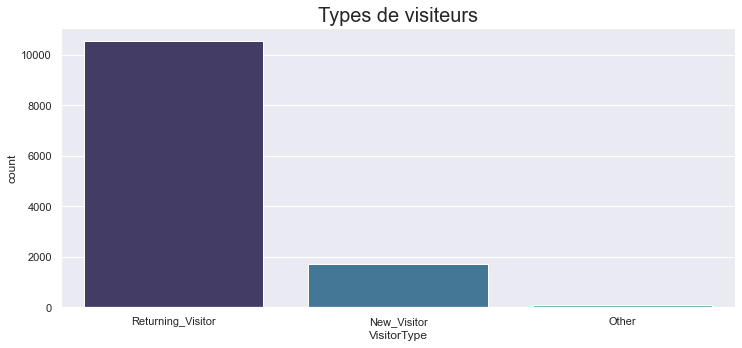

In [42]:
plt.rcParams['figure.figsize'] = (20,5)
plt.subplot(1, 2, 2)
sns.countplot(shopset['VisitorType'], palette = 'mako')
plt.title('Types de visiteurs', fontsize = 20)
plt.ylabel('count')

plt.tight_layout()
plt.show()

- Les visiteurs qui sont déja venu (>=1) sont majoritaires.

### - Browser : Quels sont les moteurs de recherche des utilisateurs ?

In [43]:
shopset['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

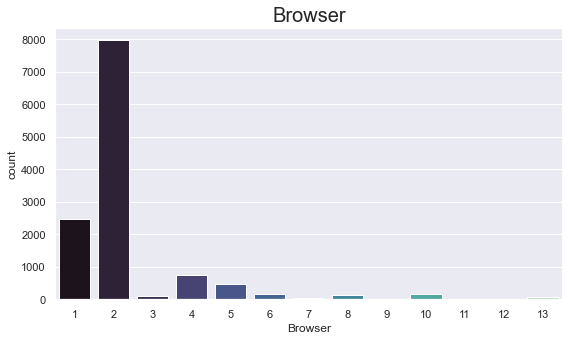

In [44]:
plt.rcParams['figure.figsize'] = (20,5)
plt.subplot(1, 2, 2)
sns.countplot(shopset['Browser'], palette = 'mako')
plt.title('Browser', fontsize = 20)
plt.ylabel('count')

plt.show()

- Le browser numéro 2 est majoritaire.

## I - 2) Transformation des données <a class="anchor" id="s1.2"></a>

Dans cette partie nous allons dans un premier temps caracteriser les données non numeriques. Nous encodons des variables non numérique, puis aussi des numériques en hot encode.

Dans un second temps, dans la partie Machine Learning, nous allons standardiser les données

### a) Encodage des données non numeriques 

##### Encodage des catégoires binaires: weekend et achat

In [45]:
shopset[["Weekend","Revenue"]] = shopset[["Weekend","Revenue"]].astype(int)

#### Catégroies non binaires : 

In [46]:
def is_var(x,var):
    if(var==x):
        return 1
    else:
        return 0

##### - *Visitor Type*

In [47]:
for visiteur in shopset["VisitorType"].unique():
    shopset[visiteur]=shopset["VisitorType"].apply(is_var,var=visiteur)

##### - *Month*

In [48]:
for mois in shopset["Month"].unique():
    shopset[mois]=shopset["Month"].apply(is_var,var=mois)

In [49]:
def is_prod(x):
    if(x>0):
        return 1
    else:
        return 0

In [50]:
shopset["prod"]=shopset["ProductRelated"].apply(is_prod)
shopset["info"]=shopset["Informational"].apply(is_prod)
shopset["admin"]=shopset["Administrative"].apply(is_prod)

In [51]:
shopset['PageValueBool'] = np.where((shopset['PageValues']==0),0,1)

## I - 3) Division du jeu de données <a class="anchor" id="s1.3"></a>

Afin de faire une analyse pertinente et detaillée des donnée nous avons divisé le tableau en deux parties: les sessions ou l'achat ou aboutit et celle ou l'achat n'a pas aboutit

In [52]:
purchased = shopset.loc[shopset['Revenue']==1]
print(f"Il y a {purchased.shape[0]} sessions qui ont poursuivi leurs achats")

Il y a 1908 sessions qui ont poursuivi leurs achats


In [53]:
nopurchased = shopset.loc[shopset['Revenue']==0]
print(f"Il y a {nopurchased.shape[0]} sessions qui n'ont pas poursuivi leurs achats")

Il y a 10422 sessions qui n'ont pas poursuivi leurs achats


# II - ANALYSE DES DONNEES <a class="anchor" id="c2"></a>

## II-1) Analyse des corrélations <a class="anchor" id="s2.1"></a>

Text(0.5, 1.0, 'Matrice de corrélation')

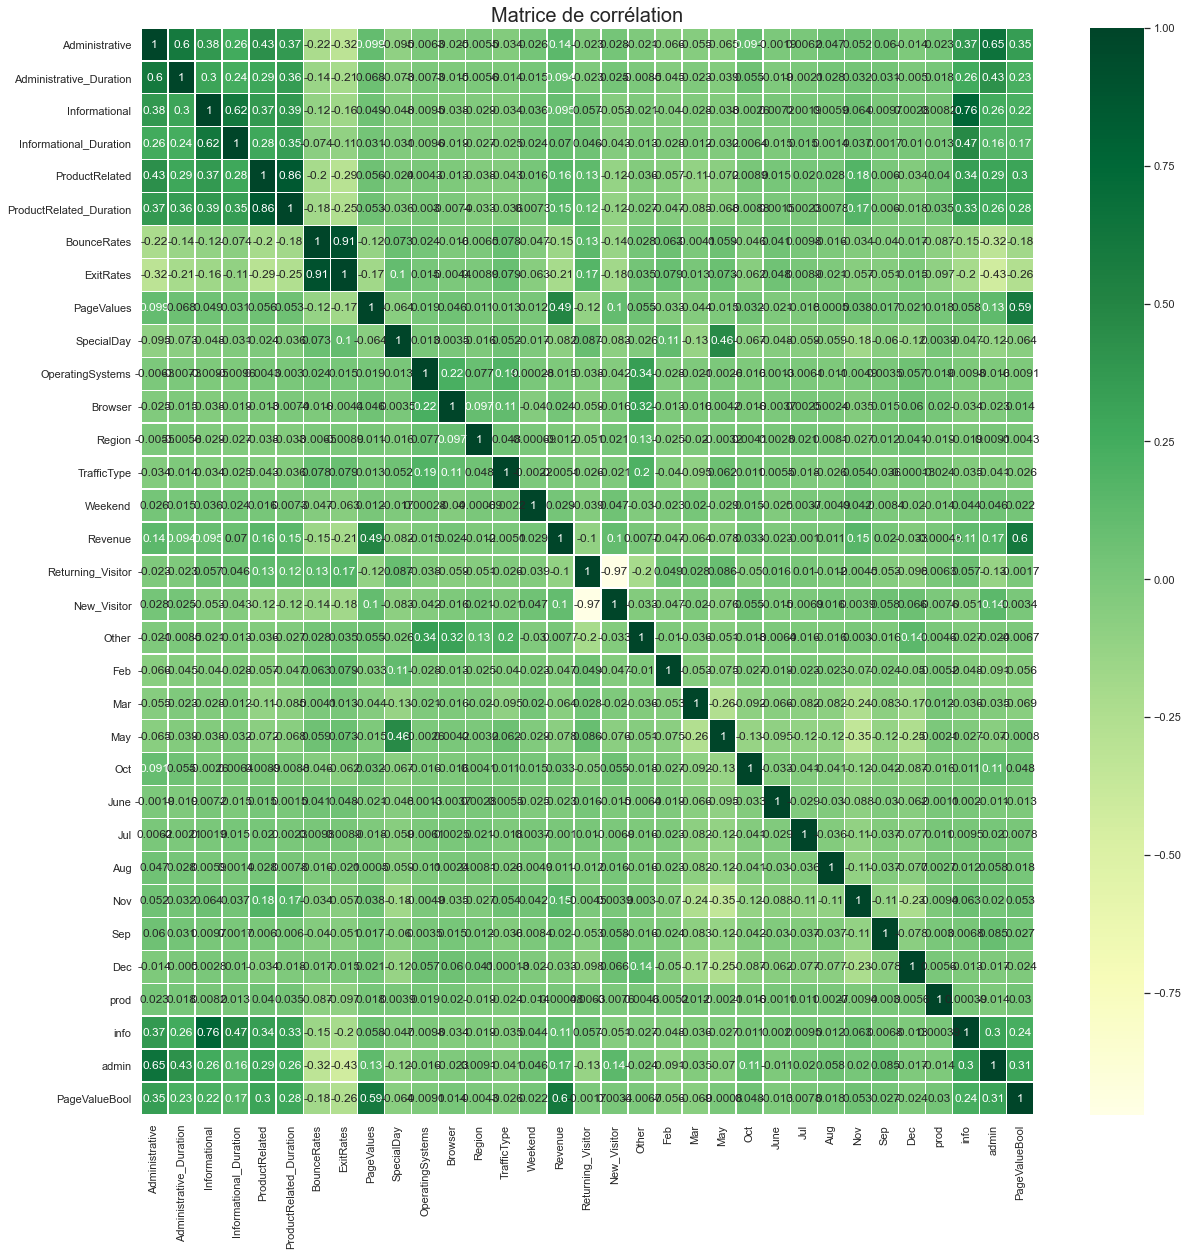

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(shopset.corr(),annot=True,cmap='YlGn',linewidths=.5)
plt.title('Matrice de corrélation', fontsize = 20)

 Interprétation : 
- La matrice de corrélation montre que des variables ont une corrélation significative avec la target 'Revenue': (exemple)
- ExitRates : -0.21
- Page value : 0.49
- BounceRates : -0.15
- Product Related : 0.16
- Nov : 0.15
- Product Related Duration : 0.15
- Admin : 0.17
- PageValueBool : 0.6

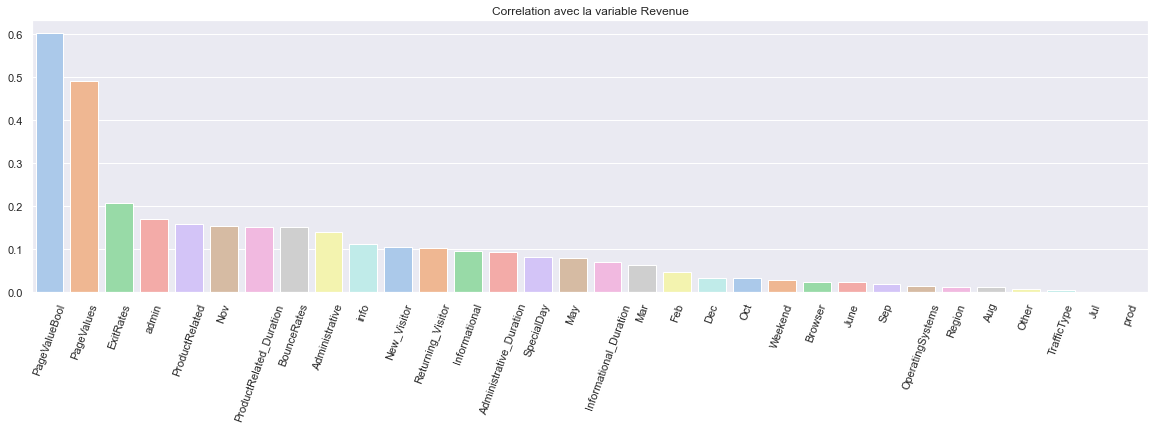

In [55]:
# Correlation avec la target Revenue
plt.figure(figsize=(20,5))
corrTarget = shopset.corr()['Revenue'].abs().sort_values(axis=0,ascending=False)
corrTarget = corrTarget.drop(labels=["Revenue"])
sns.barplot(corrTarget.index,corrTarget.values,palette = 'pastel').set_title('Correlation avec la variable Revenue')
plt.xticks(rotation = 70)
plt.show()

#### On voit bien que la corrélation la plus forte est la variable PageValuesBool (0.6) suivit de PageValue (0.49)

## II-2) Analyse bivariées / multivariées <a class="anchor" id="s2.2"></a>

## A - Le type de page visitée selon l'aboutissement de l'achat

In [56]:
AdminDF = shopset.groupby("Administrative").size().reset_index(name='count').sort_values(by="count",ascending = False).iloc[1:21,:]
AdminDF2 = purchased.groupby("Administrative").size().reset_index(name='count').sort_values(by="count",ascending = False).iloc[1:21,:]

InfoDF = shopset.groupby("Informational").size().reset_index(name='count').sort_values(by="count",ascending = False).iloc[1:21,:]
InfoDF2 = purchased.groupby("Informational").size().reset_index(name='count').sort_values(by="count",ascending = False).iloc[1:21,:]

ProduitDF = shopset.groupby("ProductRelated").size().reset_index(name='count').sort_values(by="count",ascending = False).iloc[1:21,:]
ProduitDF2 = purchased.groupby("ProductRelated").size().reset_index(name='count').sort_values(by="count",ascending = False).iloc[1:21,:]

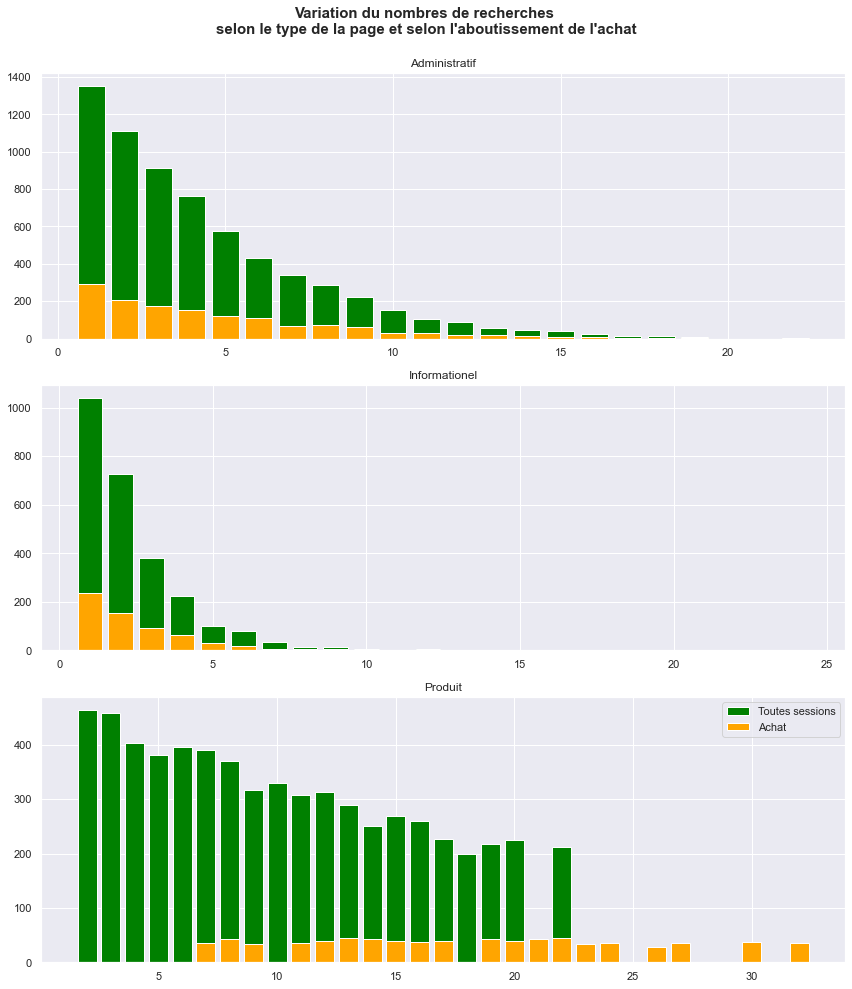

In [57]:
fig, axes = plt.subplots(3,1,figsize=(12,14))
titles=["Administratif","Informationel","Produit"]
ax=axes.flat
x=[]

ax[0].bar(AdminDF['Administrative'], AdminDF['count'], color="green", label = 'Toutes sessions')
x.append(ax[0].bar(AdminDF2['Administrative'], AdminDF2['count'],color="orange",label = 'Achat'))

ax[1].bar(InfoDF['Informational'], InfoDF['count'],color="green", label = 'Toutes sessions')
x.append(ax[1].bar(InfoDF2['Informational'], InfoDF2['count'],color="orange",label = 'Achat'))

ax[2].bar(ProduitDF['ProductRelated'], ProduitDF['count'],color="green", label = 'Toutes sessions')
x.append(ax[2].bar(ProduitDF2['ProductRelated'], ProduitDF2['count'],color="orange", label = 'Achat'))

for i, ax in enumerate(axes.flat):
    ax.set_title(titles[i])
    
fig.suptitle("Variation du nombres de recherches \nselon le type de la page et selon l'aboutissement de l'achat\n",
            fontsize=15,
            fontweight="semibold")
plt.legend()
plt.tight_layout()
plt.show()


##### interpretation:
    - Les 2 premiers plots avec les variables adminstrative et informational suivent la même courbe, on peut en déduire une corrélation. 
    - Ce n'est pas le cas des pages produit : il n'y a aucun achat si les pages produits sont visitées peu de fois (<5).

In [58]:
produit=shopset[shopset["prod"]==shopset["Revenue"]].count()
print(f"{round((produit/shopset.shape[0]*100)[0],1)}% des visites de page de type produit mène à un achat")

15.7% des visites de page de type produit mène à un achat


In [59]:
achat = shopset.loc[(shopset["prod"]==1) & (shopset["Revenue"]==1)].count()
print(f"{round((achat/purchased.shape[0]*100)[0],1)}% des achats se font sur une page de produit")

99.7% des achats se font sur une page de produit


## B - La durée de visite d'une page selon le type de page et selon l'aboutissement de l'achat

In [60]:
admin_tDF = shopset[shopset['Administrative']!=0]
info_tDF = shopset[shopset['Informational']!=0]
prod_tDF = shopset[shopset['ProductRelated']!=0]

admin_tDF = admin_tDF.groupby("Revenue",as_index=False).mean().sort_values(by="Revenue")
info_tDF = info_tDF.groupby("Revenue",as_index=False).mean().sort_values(by="Revenue")
prod_tDF = prod_tDF.groupby("Revenue",as_index=False).mean().sort_values(by="Revenue")

types_tDF = pd.merge(admin_tDF[["Revenue","Administrative_Duration"]], info_tDF[["Revenue","Informational_Duration"]],on="Revenue")
types_tDF = pd.merge(types_tDF, prod_tDF[["Revenue","ProductRelated_Duration"]],on="Revenue").T.iloc[1:,:]


In [61]:
types_tDF

,0,1
Administrative_Duration,148.707322,163.539476
Informational_Duration,156.155632,179.319090
ProductRelated_Duration,1073.283248,1882.128257


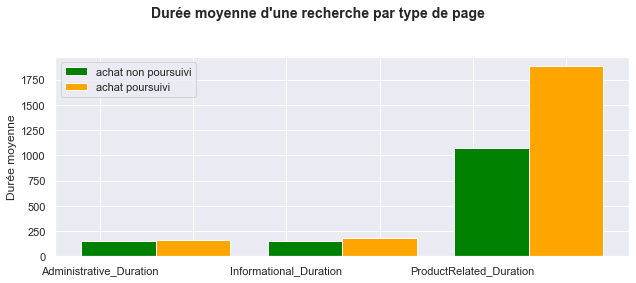

In [62]:
x_indexes = np.arange(3)
width = 0.4

fig,axe= plt.subplots(1,1,figsize=(9,4))
fig.suptitle("Durée moyenne d'une recherche par type de page\n",fontsize=14,fontweight="semibold")

axe.bar(x_indexes - width, types_tDF.iloc[:,0], width = width, label="achat non poursuivi",color='green')
axe.bar(x_indexes, types_tDF.iloc[:,1] , width = width, label="achat poursuivi",color="orange")

axe.set_ylabel("Durée moyenne")

x=["","Administrative_Duration","","Informational_Duration","","ProductRelated_Duration"]
axe.set_xticklabels(x)
axe.legend()
plt.tight_layout()

##### interpretation

    - On voit que pour chaque achat poursuivit, la durée passée sur une page est conséquente. Les pages produits prennent beaucoup de temps de consultation avant l'achat 

## C - Special day et Revenue 

In [63]:
mois=shopset.groupby(["SpecialDay","Revenue"],as_index=False).count()
mois=mois[["SpecialDay","Revenue",'prod']]
#mois["month_num"]=mois["Month"].map(mois_annee)
mois= mois.sort_values(by=["SpecialDay","Revenue"])
#mois[mois["Revenue"]==1]

mois1=mois[mois["Revenue"]==1]
mois0=mois[mois["Revenue"]==0]

c=pd.merge(mois1,mois0,on="SpecialDay")
c["ratio"]=(c["prod_x"]/(c["prod_y"]+c["prod_x"]))*100
c=c.sort_values(by="ratio")
c

,SpecialDay,Revenue_x,prod_x,Revenue_y,prod_y,ratio
4,0.8,1,11,0,314,3.384615
2,0.4,1,13,0,230,5.349794
5,1.0,1,10,0,144,6.493506
1,0.2,1,14,0,164,7.865169
3,0.6,1,29,0,322,8.262108
0,0.0,1,1831,0,9248,16.526762


- On voit que le ratio d'achat le plus élevé est finalement pour les jours non spéciaux.

## D - Bounce Rate et Revenue

Text(0.5, 1.0, 'Revenue en fonction du taux de rebond')

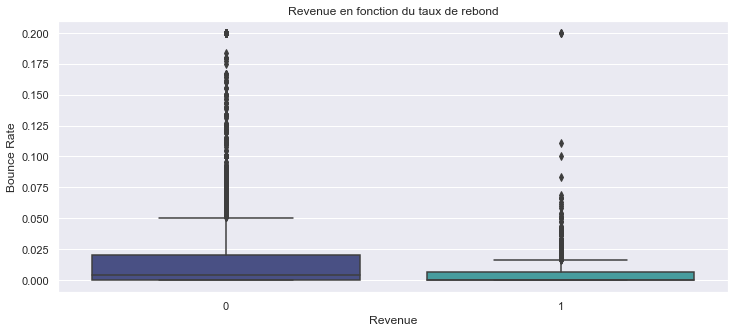

In [64]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x="Revenue",y="BounceRates", data=shopset,palette='mako')
ax.set_xlabel("Revenue")
ax.set_ylabel("Bounce Rate")
ax.set_title("Revenue en fonction du taux de rebond")

- Au dessus de 0.01 on a moins d'achats (3e quartile), plus de chance que ce ne soit pas un achat.
- Les taux de rebonds pour les achats sont beaucoup plus faible en moyenne que pour les non achats, mais ils dans les mêmes plages de valeurs.

## E - Exit Rate et Revenue

Text(0.5, 1.0, 'Revenue en fonction du taux de sortie en violin plot')

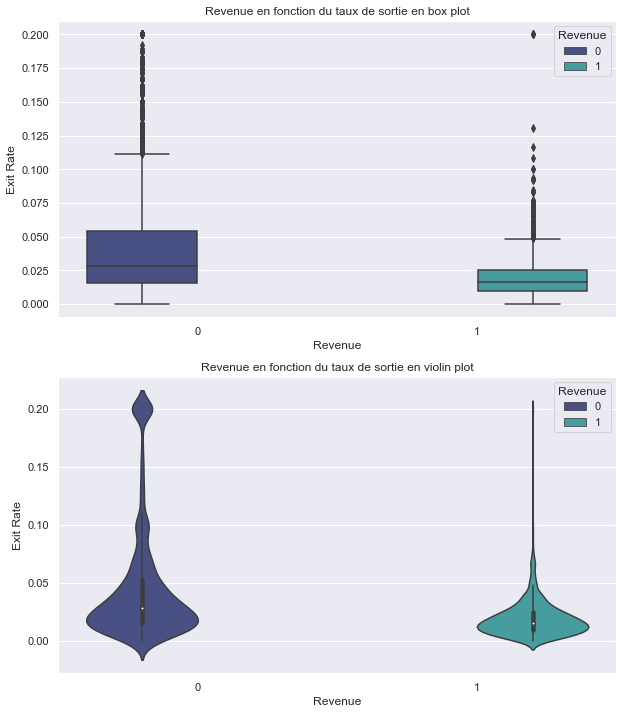

In [65]:
fig, axes = plt.subplots(2,1, figsize=(10,12))

ax1 = sns.boxplot(x="Revenue",y="ExitRates", data=shopset,hue='Revenue',palette='mako', ax = axes[0])
ax1.set_xlabel("Revenue")
ax1.set_ylabel("Exit Rate")
ax1.set_title("Revenue en fonction du taux de sortie en box plot")


ax2 = sns.violinplot(x="Revenue",y="ExitRates", hue = "Revenue",data=shopset,palette='mako')
ax2.set_xlabel("Revenue")
ax2.set_ylabel("Exit Rate")
ax2.set_title("Revenue en fonction du taux de sortie en violin plot")

- +50% des achats ont un exit Rate < 0 .025, et dépassé ce seuil, il y a beaucoup plis de chance que ce ne soit pas un achat.
- On observe donc que le taux de sortie influe sur la variable revenue. Plus il est concentré faiblement, plus il y a de chances d'un achat

## F - ExitRates en fonction de  BounceRates et Revenue

- Regardons d'abord BounceRates en fonction de ExitRates

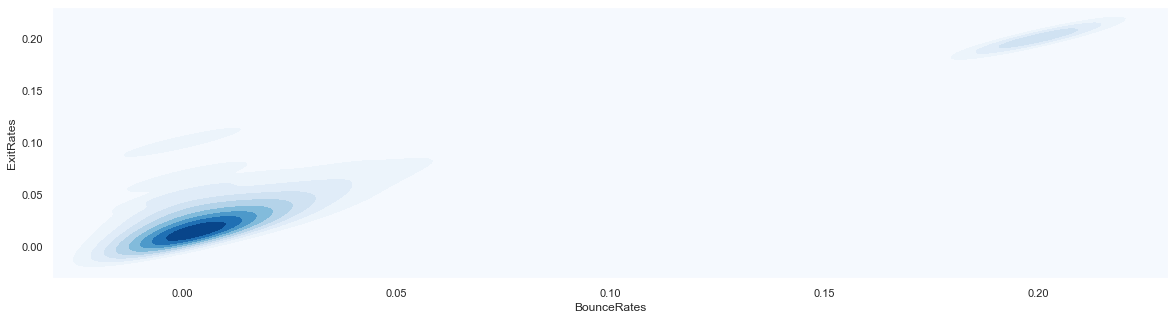

In [66]:
sns.kdeplot(x=shopset.BounceRates, y=shopset.ExitRates, cmap="Blues", shade=True, thresh=0)
plt.show()

- On dirait qu'il y a comme une corrélation linéaire, essayons de l'afficher

Text(0.5, 1.0, 'ExitRates en fonction de BounceRates et revenue')

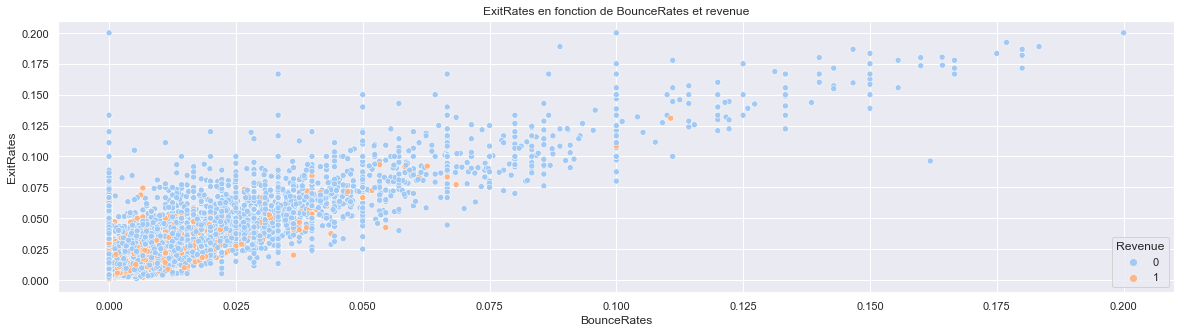

In [67]:
ax = sns.scatterplot(x="BounceRates", y="ExitRates",hue = 'Revenue',palette = 'pastel', data=shopset)
ax.set_title('ExitRates en fonction de BounceRates et revenue')

- On remarque qu'un taux de rebond élevé et un taux de sortie élevé ne donnent pas de Revenue
- On distingue clairement une corrélation entre ces 2 variables, que nous allons vérifier

### Coefficient de Pearson
Le coefficient de Pearson ou Pearson r est une mesure qui exprime à quel point deux variables sont linéairement corrélées.
Il est égale au quotient de la covariance des deux variables et du produit des deux écarts-types.

In [68]:
coeff_pearson,_ = pearsonr(shopset['BounceRates'],shopset['ExitRates'])
print("Coefficient de Pearson entre BounceRates et ExitRates = {}".format(coeff_pearson))

Coefficient de Pearson entre BounceRates et ExitRates = 0.9130043961815213


- Cela indique donc que lorsqu'une page web a un taux de rebond faible, elle a également un taux de sortie faible, et qu'il y a de grandes chances que cette page mène à un achat

## G - Pages Values par type de page et Revenue 

In [69]:
shopset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,June,Jul,Aug,Nov,Sep,Dec,prod,info,admin,PageValueBool
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


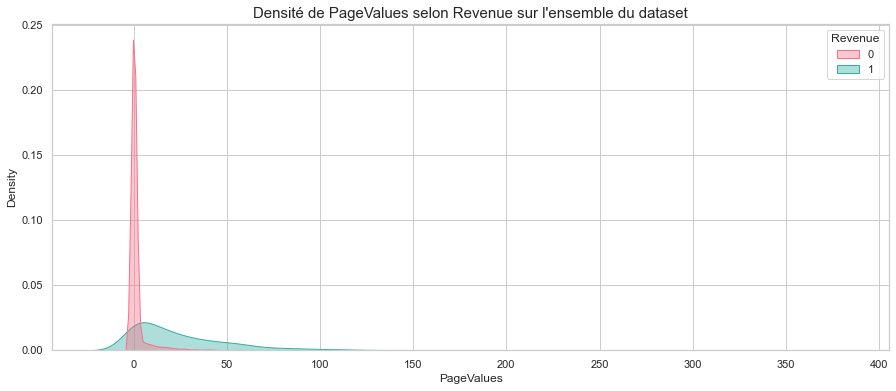

In [70]:
plt.rcParams["figure.figsize"]=15,6
sns.set(style="whitegrid")
sns.kdeplot(data=shopset, x="PageValues", hue="Revenue", fill=True, common_norm=False, alpha=0.4,palette='husl')
plt.title("Densité de PageValues selon Revenue sur l'ensemble du dataset",fontsize=15)
plt.show()


- On conclut que la plupart des achats se font avec une page value entre 0 et 50

- On voit qu'une PageValue nulle engendre très rarement un achat. Regardons maintenant par type de page

In [71]:
#df avec seulement la page administrative
dfAdmin = shopset.loc[(shopset['Administrative']>=1) & (shopset['Informational']==0) & (shopset['ProductRelated']==0)]
dfAdmin.head()
#etant donnée qu'il y a trop peu de données si on exlut les 2 autres types à chaque fois, on prend les conditions >1 pour chaque type

dfAdmin = shopset.loc[(shopset['Administrative']>=1)]

In [72]:
dfInfo = shopset.loc[(shopset['Informational']>=1)]
dfInfo.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,June,Jul,Aug,Nov,Sep,Dec,prod,info,admin,PageValueBool
29,1,6.0,1,0.0,45,1582.750000,0.043478,0.050821,54.179764,0.4,...,0,0,0,0,0,0,1,1,1,1
57,4,56.0,2,120.0,36,998.741667,0.000000,0.014736,19.447079,0.2,...,0,0,0,0,0,0,1,1,1,1
98,0,0.0,1,0.0,7,50.000000,0.038095,0.080952,0.000000,0.6,...,0,0,0,0,0,0,1,1,0,0
103,2,31.0,1,16.0,36,2083.530952,0.000000,0.013510,0.000000,0.8,...,0,0,0,0,0,0,1,1,1,0
106,0,0.0,1,0.0,9,215.000000,0.044444,0.074074,0.000000,0.8,...,0,0,0,0,0,0,1,1,0,0


In [73]:
dfProduit = shopset.loc[(shopset['ProductRelated']>=1)]
dfProduit.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,June,Jul,Aug,Nov,Sep,Dec,prod,info,admin,PageValueBool
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


Text(0.5, 1.0, 'Densité de PageValues pour les pages produits')

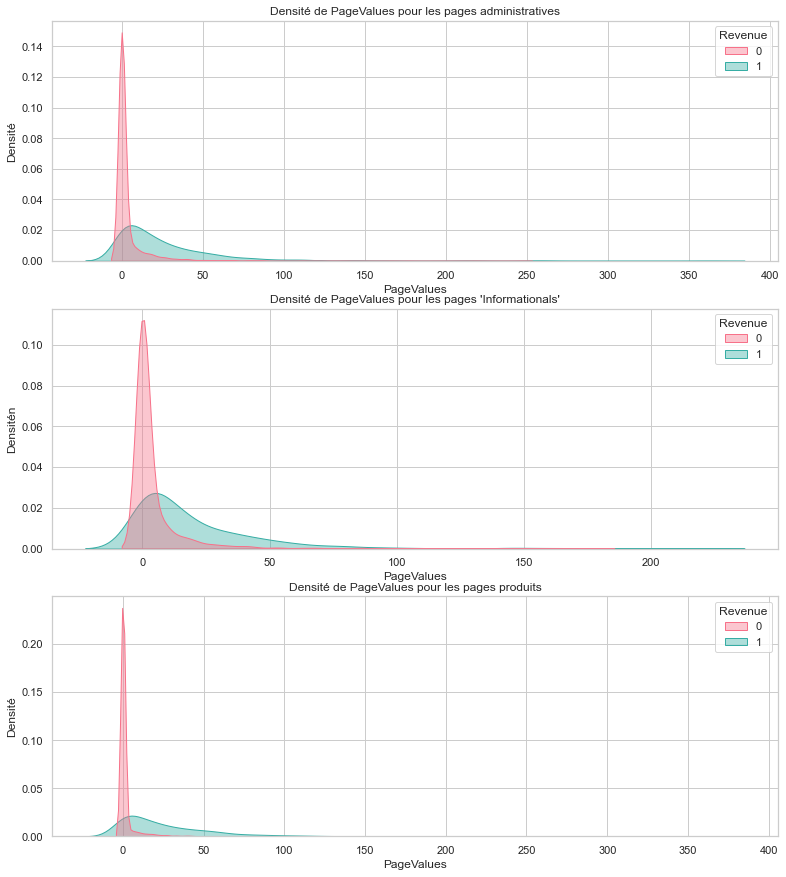

In [74]:
fig, axes = plt.subplots(3,1, figsize=(13,15))

ax1 = sns.kdeplot(data=dfAdmin, x="PageValues", hue="Revenue", fill=True, common_norm=False, alpha=0.4,palette='husl',ax=axes[0])
ax1.set_xlabel("PageValues", fontsize=12)
ax1.set_ylabel("Densité", fontsize=12)
ax1.set_title("Densité de PageValues pour les pages administratives", fontsize=12)


ax2 = sns.kdeplot(data = dfInfo, x="PageValues", hue="Revenue", fill=True, common_norm=False, alpha=0.4,palette='husl',ax=axes[1])
ax2.set_xlabel("PageValues", fontsize=12)
ax2.set_ylabel("Densitén", fontsize=12)
ax2.set_title("Densité de PageValues pour les pages 'Informationals'", fontsize=12)

ax3 = sns.kdeplot(data = dfProduit, x="PageValues", hue="Revenue", fill=True, common_norm=False, alpha=0.4,palette='husl',ax=axes[2])
ax3.set_xlabel("PageValues", fontsize=12)
ax3.set_ylabel("Densité", fontsize=12)
ax3.set_title("Densité de PageValues pour les pages produits", fontsize=12)

- On constate que PageValues influe directement sur l'achat et que selon le type de pages, une pageValue nulle de 0 n'engendre pas d'achat.

#### Regardons la corrélation entre Revenue et PageValues, et Revenue et notre nouvelle variable PageValueBool

In [75]:
coeff_pearsonbool,_ = pearsonr(shopset['Revenue'],shopset['PageValues'])
print("Coefficient de Pearson entre Revenue et PageValues = {}".format(coeff_pearsonbool))

Coefficient de Pearson entre Revenue et PageValues = 0.49256929525120746


In [76]:
coeff_pearsonbool,_ = pearsonr(dftest['Revenue'],dftest['PageValueBool'])
print("Coefficient de Pearson entre Revenue et PageValueBool = {}".format(coeff_pearsonbool))

Coefficient de Pearson entre Revenue et PageValueBool = 0.60251721904132


#### Notre nouvelle variable PageValueBool a une corélation plus forte, nous l'utiliserons dans nos modèles d'IA !

## H - Weekend et mois de l'année avec Revenue

Text(0.5, 1.0, "Proportion d'achats ou non selon si la session est en weekend")

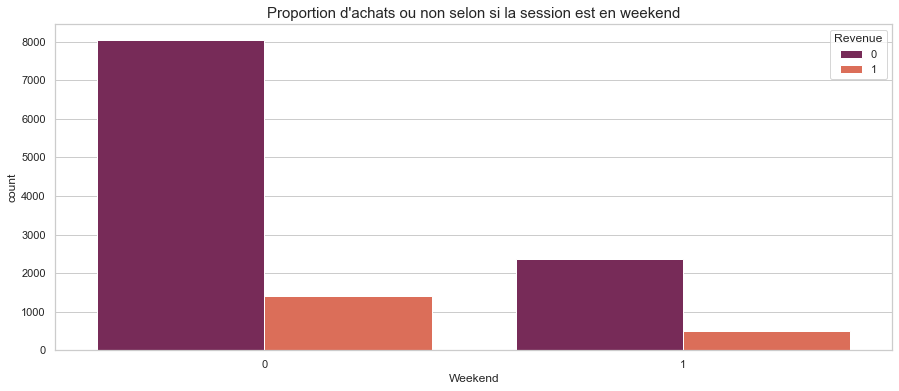

In [77]:
# grouped barplot
ax = sns.countplot(x="Weekend", data=shopset, 
              palette='rocket', hue="Revenue")
plt.title("Proportion d'achats ou non selon si la session est en weekend",fontsize=15)

In [78]:
shopset['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [79]:
ratio1 = (len(shopset.loc[(shopset['Weekend']==0)& (shopset['Revenue']==1)]) / len(shopset.loc[(shopset['Weekend']==0)]))
print('Hors weekend, il y a ',round(ratio1*100,2),' % de chance que la session aboutisse à un achat')


Hors weekend, il y a  14.89  % de chance que la session aboutisse à un achat


In [80]:
ratio2 = (len(shopset.loc[(shopset['Weekend']==1)& (shopset['Revenue']==1)]) / len(shopset.loc[(shopset['Weekend']==1)]))
print('En weekend, il y a ',round(ratio2*100,2),' % de chance que la session aboutisse à un achat')

En weekend, il y a  17.4  % de chance que la session aboutisse à un achat


- On voit qu'il y a plus d'achat hors weekend, mais le ratio sur les non achats est bien plus fort en weekend. Donc une session en weekend à plus de chance de finir en achat que hors weekend

In [81]:
type(shopset)
type(shopset['Month'])
dfMois = shopset[['Month', 'Revenue']].copy()
dfMois

,Month,Revenue
0,Feb,0
1,Feb,0
2,Feb,0
3,Feb,0
4,Feb,0
...,...,...
12325,Dec,0
12326,Nov,0
12327,Nov,0
12328,Nov,0


Text(0.5, 1.0, 'Revenue en fonction du mois')

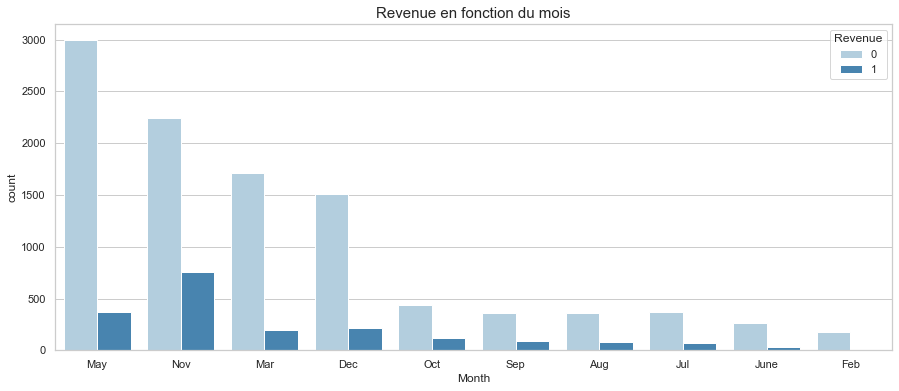

In [82]:
sns.countplot(x=dfMois['Month'],hue='Revenue', data=dfMois, palette='Blues',order = shopset['Month'].value_counts().index)
plt.title("Revenue en fonction du mois",fontsize = 15)

- On observe que c'est le mois de Novembre avec le plus de chance de finir en achat

In [83]:
ratio3 = (len(shopset.loc[(shopset['Month']=='Nov')& (shopset['Revenue']==1)]) / len(shopset.loc[(shopset['Month']=='Nov')])) * 100
print('Au mois de Novembre, il y a ',ratio3,' % de chance que la session aboutisse à un achat')

Au mois de Novembre, il y a  25.350233488992664  % de chance que la session aboutisse à un achat


# III - Modelisation de l'intention d'achat - Machine Learning & Deep Learning <a class="anchor" id="c3"></a>

- Rappel des corrélations de notre dataset

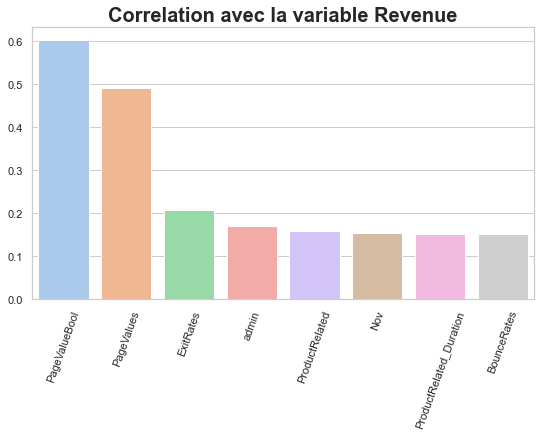

In [84]:
plt.rcParams['figure.figsize'] = (9,5)
corrT=corrTarget[0:8]
sns.barplot(corrT.index,corrT.values,palette = 'pastel').set_title('Correlation avec la variable Revenue',fontsize=20,fontweight="semibold")
plt.xticks(rotation = 70)
plt.show()

## III-1) Test de diffèrents modèles et interpretation <a class="anchor" id="s3.1"></a>

- Choix des variables du modèle

In [85]:
test_row = rd.randrange(len(shopset)-1)
row = list(shopset[['PageValueBool','PageValues', 'ExitRates','ProductRelated', 'Nov','ProductRelated_Duration',
             "BounceRates","admin", "Revenue"]].loc[test_row])
shopset = shopset.drop(test_row)

In [86]:
X1 = shopset[['PageValueBool','PageValues', 'ExitRates','ProductRelated', 'Nov','ProductRelated_Duration',
             "BounceRates","admin"]]

Y=shopset["Revenue"]

In [87]:
print(f"Il y a {X1.shape[1]} variables dans le modèle de prediction: ")
print("-",*list(X1.iloc[:,:].columns),"-")

Il y a 8 variables dans le modèle de prediction: 
- PageValueBool PageValues ExitRates ProductRelated Nov ProductRelated_Duration BounceRates admin -


- Scaling

In [88]:
sc=StandardScaler()
X_fit = sc.fit(X1)
X = X_fit.transform(X1)
print(np.shape(X))

(12329, 8)


- Separation train test

In [89]:
indices = np.arange(shopset.shape[0])
(
    X_train,
    X_test,
    Y_train,
    Y_test,
    indices_train,
    indices_test,
) = train_test_split(X,Y, indices, test_size=0.2)

print( 'dataset:', shopset.shape)
print( '\nX_train set:', X_train.shape)
print( 'Y_train set:', Y_train.shape)
print( '\nX_test set:', X_test.shape)
print( 'Y_test set:', Y_test.shape)

dataset: (12329, 35)

X_train set: (9863, 8)
Y_train set: (9863,)

X_test set: (2466, 8)
Y_test set: (2466,)


### Fonctions pour le choix des parametres des modèles utilisés : Gaussien, Support vector Machine, KNN, Logistic regression, Random Forest, XGBoost

In [90]:
def best_param(Xtrain=X_train,Ytrain=Y_train,modele="knn"):
    if(modele=="knn"):
        Ks = 30
        mean_acc = np.zeros((Ks-1))
        std_acc = np.zeros((Ks-1))

        for n in range(1,Ks): 
            neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
            yhat=neigh.predict(X_test)
            mean_acc[n-1] = metrics.accuracy_score(Y_test,yhat)

            std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])
        
        plt.rcParams['figure.figsize'] = (14,5)
        plt.plot(range(1,Ks),mean_acc,'g')
        plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
        plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="blue")
        plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
        plt.ylabel('Accuracy ')
        plt.xlabel('Number of K')
        plt.tight_layout()
        plt.show()

        score=mean_acc.max()
        param={'n_neighbors':mean_acc.argmax()+1}  
    
    else:
        if(modele=="Gaussian"):
            param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
            grid = GridSearchCV(GaussianNB(), param_grid, verbose=1, scoring='accuracy');

        elif(modele=="svm"):
            param_grid = {'C': [0.1, 1, 10, 100, 1000], 
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf']} 
            grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3);
        elif(modele=="DT"):
            param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
            grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5, verbose=True);
            grid.fit(X_train, Y_train);
        elif(modele=="LR"):
            param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
            grid=GridSearchCV(LogisticRegression(),param_grid,cv=10)
        elif(modele=="RF"):
            param_grid = { 'n_estimators': [100,200, 500],'max_features': ['auto', 'sqrt'],
                          'max_depth' : [4,6,8],'criterion' :['gini', 'entropy']}
            grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv= 5)
        elif(modele=="XGB"):
            params_grid = {'n_estimators': range(8, 20),'max_depth': range(6, 10),
                           'learning_rate': [.4, .45, .5, .55, .6],'colsample_bytree': [.6, .7, .8, .9, 1]}
            xgbmodel = XGBClassifier(n_estimators=10)
            grid = RandomizedSearchCV(param_distributions=params_grid, estimator = xgbmodel, 
                                         scoring = "accuracy", verbose = 1, n_iter = 50, cv = 3)

        grid=grid.fit(Xtrain,Ytrain); 
        score=grid.best_score_
        param=grid.best_params_
        
    print("Meilleur score:",score)
    print("Meilleur.s paramètre.s:",param)
    return score,param

In [91]:
def conf_matrix(Xtest,Ytest,modele):
    cm=confusion_matrix(Ytest,modele.predict(Xtest))
    plt.rcParams['figure.figsize'] = (6, 6)
    sns.heatmap(cm, annot = True,cmap=plt.cm.Blues)
    plt.title("Matrice de confusion",fontsize=15,fontweight="semibold")
    plt.tight_layout()
    plt.show()
    return cm

In [92]:
def summary(Xtest,Ytest,modele):
    pred = modele.predict(Xtest)
    print("Jaccard Score - REVENUE = 0 :", jaccard_score(Ytest, pred,pos_label=0))
    print("Jaccard Score - REVENUE = 1:", jaccard_score(Ytest, pred,pos_label=1))
    print("F1 SCORE:", f1_score(Ytest, pred, average='weighted'))
    print("\n")
    return metrics.classification_report(Ytest, modele.predict(Xtest))  

### 1 - KNN

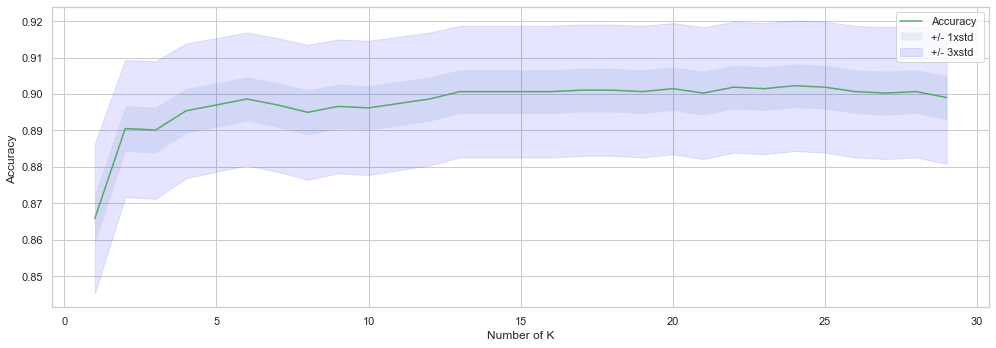

Meilleur score: 0.9022708840227088
Meilleur.s paramètre.s: {'n_neighbors': 24}


In [93]:
scoreKNN,paramKNN=best_param()

In [94]:
modelKNN=KNeighborsClassifier(n_neighbors=paramKNN['n_neighbors'])
modelKNN.fit(X_train,Y_train)
print("Score sur le train:",modelKNN.score(X_train,Y_train))
print("Score sur le Test",modelKNN.score(X_test,Y_test))

Score sur le train: 0.9084457061745919
Score sur le Test 0.9022708840227088


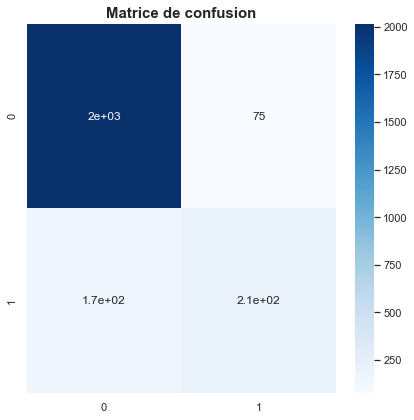

array([[2016,   75],
       [ 166,  209]], dtype=int64)

In [95]:
conf_matrix(X_test,Y_test,modelKNN)

In [96]:
print(summary(X_test,Y_test,modelKNN))

Jaccard Score - REVENUE = 0 : 0.8932210899424015
Jaccard Score - REVENUE = 1: 0.46444444444444444
F1 SCORE: 0.8965639190398603


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2091
           1       0.74      0.56      0.63       375

    accuracy                           0.90      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.90      0.90      0.90      2466



### 2 - GAUSSIAN NAIVE BAYES

In [97]:
scoreNB,paramNB=best_param(X_train,Y_train,"Gaussian")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Meilleur score: 0.876507753248983
Meilleur.s paramètre.s: {'var_smoothing': 0.8111308307896871}


In [98]:
modelNB = GaussianNB(var_smoothing = paramNB['var_smoothing'])
modelNB.fit(X_train, Y_train)

print("Score sur le train: ", modelNB.score(X_train, Y_train))
print("Score sur le test: ", modelNB.score(X_test, Y_test))

Score sur le train:  0.8760012166683565
Score sur le test:  0.8787510137875101


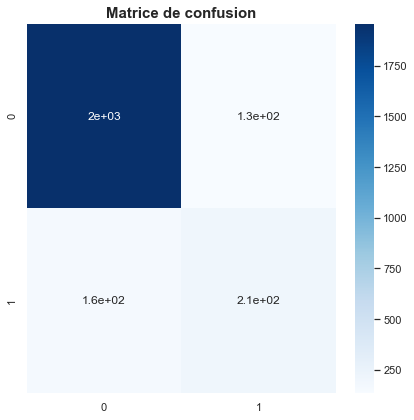

array([[1957,  134],
       [ 165,  210]], dtype=int64)

In [99]:
conf_matrix(X_test,Y_test,modelNB)

In [100]:
print(summary(X_test,Y_test,modelNB))

Jaccard Score - REVENUE = 0 : 0.8674645390070922
Jaccard Score - REVENUE = 1: 0.412573673870334
F1 SCORE: 0.8765832479622432


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2091
           1       0.61      0.56      0.58       375

    accuracy                           0.88      2466
   macro avg       0.77      0.75      0.76      2466
weighted avg       0.87      0.88      0.88      2466



### 3 - MODELE SVM

In [101]:
scoreSVM,paramSVM=best_param(X_train,Y_train,"svm")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.897 total time=   1.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.883 total time=   1.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.901 total time=   1.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.881 total time=   1.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.884 total time=   1.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.905 total time=   1.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.896 total time=   1.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.908 total time=   1.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.898 total time=   1.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.895 total time=   1.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.903 total time=   1.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.877 total time=  18.1s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.891 total time=  30.1s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.878 total time=  19.7s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.873 total time=  17.9s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.906 total time=  17.9s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.893 total time=  21.4s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.907 total time=  19.4s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.899 total time=  19.7s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.886 total time=  22.8s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.907 total time=   9.7s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.898 total time=   6.3s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.913 total time=   6.9s
[CV 4/5] END ....C=1000, gam

In [102]:
modelSVM = svm.SVC(C=paramSVM['C'], gamma= paramSVM["gamma"], kernel=paramSVM["kernel"])
modelSVM.fit(X_train, Y_train)


print("Score sur le train: ", modelSVM.score(X_train, Y_train))
print("Score sur le test: ", modelSVM.score(X_test, Y_test))

Score sur le train:  0.9084457061745919
Score sur le test:  0.9038929440389294


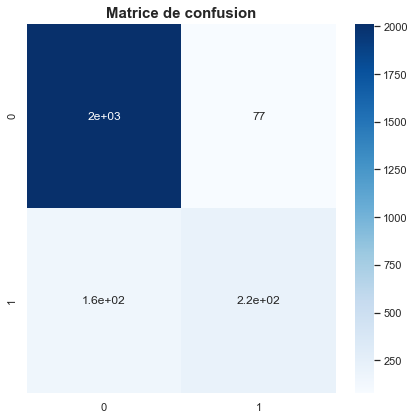

array([[2014,   77],
       [ 160,  215]], dtype=int64)

In [103]:
conf_matrix(X_test,Y_test,modelSVM)

In [104]:
print(summary(X_test,Y_test,modelSVM))

Jaccard Score - REVENUE = 0 : 0.8947134606841404
Jaccard Score - REVENUE = 1: 0.4756637168141593
F1 SCORE: 0.8988484262245872


              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2091
           1       0.74      0.57      0.64       375

    accuracy                           0.90      2466
   macro avg       0.83      0.77      0.79      2466
weighted avg       0.90      0.90      0.90      2466



### 4 -  DECISION TREE

In [105]:
scoreTREE,paramTREE=best_param(modele="DT")

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Meilleur score: 0.8997255546222893
Meilleur.s paramètre.s: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}


In [106]:
modelTREE = DecisionTreeClassifier(ccp_alpha=paramTREE['ccp_alpha'], criterion = paramTREE['criterion'],
                                  max_depth = paramTREE['max_depth'],max_features = paramTREE['max_features'])
modelTREE.fit(X_train,Y_train)

print("Score sur le train: ", modelTREE.score(X_train, Y_train))
print("Score sur le test: ", modelTREE.score(X_test, Y_test))

Score sur le train:  0.8969887458177025
Score sur le test:  0.8957826439578265


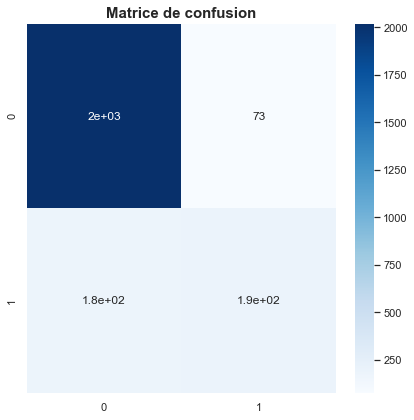

array([[2018,   73],
       [ 184,  191]], dtype=int64)

In [107]:
conf_matrix(X_test,Y_test,modelTREE)

In [108]:
print(summary(X_test,Y_test,modelTREE))

Jaccard Score - REVENUE = 0 : 0.8870329670329671
Jaccard Score - REVENUE = 1: 0.4263392857142857
F1 SCORE: 0.8880782260757902


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2091
           1       0.72      0.51      0.60       375

    accuracy                           0.90      2466
   macro avg       0.82      0.74      0.77      2466
weighted avg       0.89      0.90      0.89      2466



### 5 - LOGISTIC REGRESSION

In [109]:
scoreLR,paramLR=best_param(modele="LR")

Meilleur score: 0.8983063805125864
Meilleur.s paramètre.s: {'C': 1.0, 'penalty': 'l2'}


In [110]:
modelLR = LogisticRegression(C=paramLR["C"],penalty=paramLR["penalty"])
modelLR=modelLR.fit(X_train,Y_train)

print("Score sur le train: ", modelLR.score(X_train, Y_train))
print("Score sur le test: ", modelLR.score(X_test, Y_test))

Score sur le train:  0.8982054141741863
Score sur le test:  0.9018653690186537


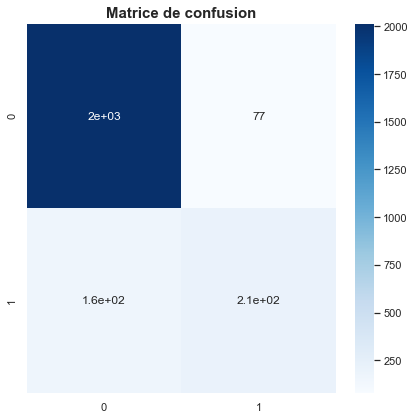

array([[2014,   77],
       [ 165,  210]], dtype=int64)

In [111]:
conf_matrix(X_test,Y_test,modelLR)

In [112]:
print(summary(X_test,Y_test,modelLR))

Jaccard Score - REVENUE = 0 : 0.8927304964539007
Jaccard Score - REVENUE = 1: 0.4646017699115044
F1 SCORE: 0.8963540489334847


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2091
           1       0.73      0.56      0.63       375

    accuracy                           0.90      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.89      0.90      0.90      2466



### 6 - XGBOOST CLASSIFIER

In [113]:
scoreXGB,paramXGB=best_param(X_train,Y_train,"XGB")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Meilleur score: 0.9012468260154346
Meilleur.s paramètre.s: {'n_estimators': 8, 'max_depth': 6, 'learning_rate': 0.45, 'colsample_bytree': 0.9}


In [114]:
modelXGB = XGBClassifier(n_estimators=paramXGB["n_estimators"],max_depth=paramXGB["max_depth"],
                         learning_rate=paramXGB["learning_rate"],colsample_bytree=paramXGB["colsample_bytree"],)
modelXGB.fit(X_train, Y_train)



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.45, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=8, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [115]:
accuracy_test = accuracy_score(Y_test, modelXGB.predict(X_test))
accuracy_train = accuracy_score(Y_train, modelXGB.predict(X_train))

print("Score sur le train: ", accuracy_train*100.0)
print("Score sur le test: ", accuracy_test*100.0)

Score sur le train:  92.55804521950725
Score sur le test:  90.14598540145985


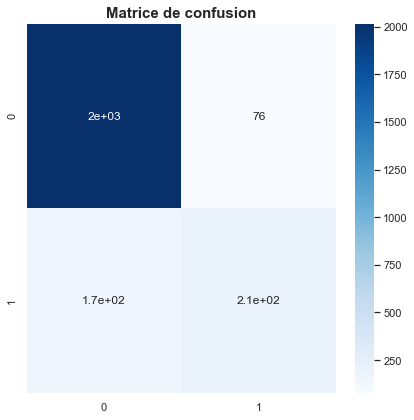

array([[2015,   76],
       [ 167,  208]], dtype=int64)

In [116]:
conf_matrix(X_test,Y_test,modelXGB)

In [117]:
print(summary(X_test,Y_test,modelXGB))

Jaccard Score - REVENUE = 0 : 0.8923826395039858
Jaccard Score - REVENUE = 1: 0.4611973392461197
F1 SCORE: 0.8957055283264982


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2091
           1       0.73      0.55      0.63       375

    accuracy                           0.90      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.89      0.90      0.90      2466



### 7 - RANDOM FOREST CLASSIFIER

In [118]:
scoreRF,paramRF=best_param(X_train,Y_train,modele="RF")

Meilleur score: 0.9056061084272568
Meilleur.s paramètre.s: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [119]:
modelRF=RandomForestClassifier(criterion= paramRF['criterion'],max_depth=paramRF['max_depth'],
                               max_features=paramRF['max_features'],n_estimators=paramRF['n_estimators'])
modelRF.fit(X_train, Y_train)

print("Precision sur le train : ",modelRF.score(X_train, Y_train))
print("Précision sur le test : ",modelRF.score(X_test, Y_test))

Precision sur le train :  0.9275068437595052
Précision sur le test :  0.9051094890510949


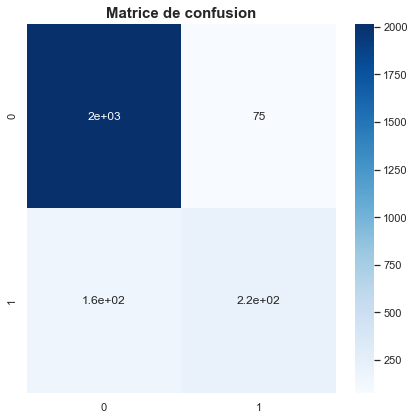

array([[2016,   75],
       [ 159,  216]], dtype=int64)

In [120]:
conf_matrix(X_test,Y_test,modelRF)

AUC for Random Forest 0.9186481747170413


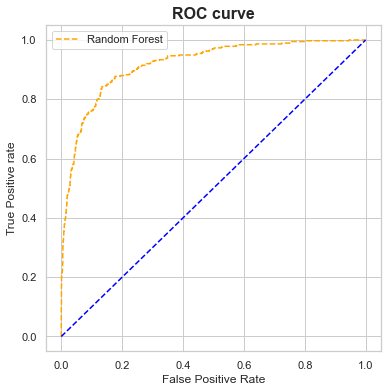

In [121]:
from sklearn.metrics import roc_auc_score, roc_curve

pred_prob1 = modelRF.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])


print('AUC for Random Forest', auc_score1)


plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve',fontsize=16,fontweight="semibold")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend()
plt.show();

In [122]:
print(summary(X_test,Y_test,modelRF))

Jaccard Score - REVENUE = 0 : 0.896
Jaccard Score - REVENUE = 1: 0.48
F1 SCORE: 0.9000596272147598


              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2091
           1       0.74      0.58      0.65       375

    accuracy                           0.91      2466
   macro avg       0.83      0.77      0.80      2466
weighted avg       0.90      0.91      0.90      2466



In [123]:
importance = pd.Series(modelRF.feature_importances_, index=X1.columns).sort_values(ascending=False)

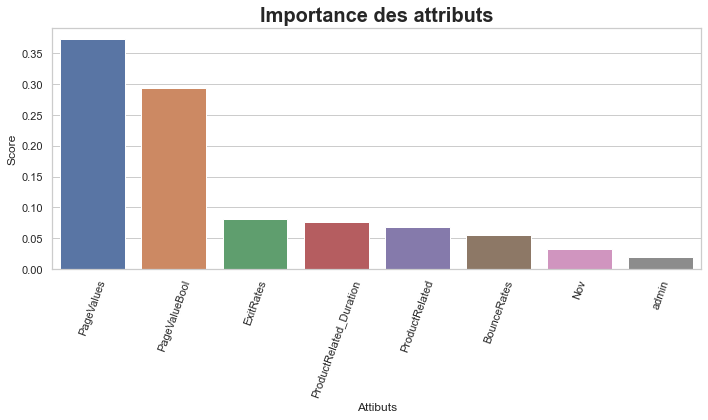

In [124]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=importance.index, y=importance,orient="v")
ax.set_title("Importance des attributs",fontsize=20,fontweight="semibold")
#ax.set_yticklabels(importance.index)
ax.set_xticklabels(importance.index,rotation=70)
ax.set_xlabel("Attibuts")
ax.set_ylabel("Score")
plt.tight_layout()
plt.show()

## III-2) Comparaison des modèles <a class="anchor" id="s3.2"></a>

In [125]:
modeleDF=pd.DataFrame()
modeles=[modelKNN,modelNB,modelSVM,modelTREE,modelLR,modelXGB,modelRF]

algo=["KNN_Class","GaussianNB_Class","SVC","Decision_tree","Logistic_regression","XGBoost","Random Forest"]
modeleDF["Algorithm"]=algo

#modeleDF["Score_test"]=list(map(lambda x:round(x.score(X_test, Y_test),2),modeles))
modeleDF["MSE"]=list(map(lambda x:round(mean_squared_error(Y_test,x.predict(X_test)),2),modeles))
modeleDF["MAE"]=list(map(lambda x:round(mean_absolute_error(Y_test,x.predict(X_test)),2),modeles))
modeleDF["R2"]=list(map(lambda x:round(r2_score(Y_test,x.predict(X_test)),2),modeles))
#modeleDF["Exp_var_score"]=list(map(lambda x:round(explained_variance_score(Y_test, x.predict(X_test)),2),modeles))
modeleDF["Jacc_score0"]=list(map(lambda x:round(jaccard_score(Y_test, x.predict(X_test),pos_label=0),2),modeles))
modeleDF["Jacc_score1"]=list(map(lambda x:round(jaccard_score(Y_test, x.predict(X_test),pos_label=1),2),modeles))
modeleDF["F1"]=list(map(lambda x:round(f1_score(Y_test, x.predict(X_test), average='weighted'),5),modeles))

modeleDF.set_index("Algorithm",inplace=True);

In [126]:
modeleDF.sort_values(by=['F1'],ascending = False)

,MSE,MAE,R2,Jacc_score0,Jacc_score1,F1
Algorithm,,,,,,
Random Forest,0.09,0.09,0.26,0.90,0.48,0.90006
SVC,0.10,0.10,0.25,0.89,0.48,0.89885
KNN_Class,0.10,0.10,0.24,0.89,0.46,0.89656
Logistic_regression,0.10,0.10,0.24,0.89,0.46,0.89635
XGBoost,0.10,0.10,0.24,0.89,0.46,0.89571
Decision_tree,0.10,0.10,0.19,0.89,0.43,0.88808
GaussianNB_Class,0.12,0.12,0.06,0.87,0.41,0.87658


**COMPARER LES MODELES** : 

- MSE : L'erreur quadratique moyenne (EQM) indique à quel point une ligne de régression est proche d'un ensemble de points. Elle correspond à la somme des carrés distances entre les points et la ligne de régression (ces distances sont les "erreurs"). 

- MAE :L'erreur absolue moyenne (EAM) : moyenne arithmétique des valeurs absolues des écarts.

**ESTIMER LE MODELE** :

- Jaccard score : Etudie la similarité entre des objets constitués d'attributs binaires. Cette valeur représente le nombre d'attributs qui valent 0 dans A et 0 dans B.


- Le F1-score est une métrique de classification qui mesure la capacité d’un modèle à bien prédire les individus positifs :
    - en termes de precision (Vrai positif / [Vrai positif + Vrai négatif]) 
    - en termes de recall (Vrai positif / [Vrai positif + Faux négatif])
    
    Il correspond en effet à la moyenne harmonique de ces indicateurs.

## III-3) Deep Learning <a class="anchor" id="s3.3"></a>

- Préparation des données

- on hot encode les données, c'est à dire qu'on créer une colonne par valeur possible de notre target (ici 0 ou 1)

<div>
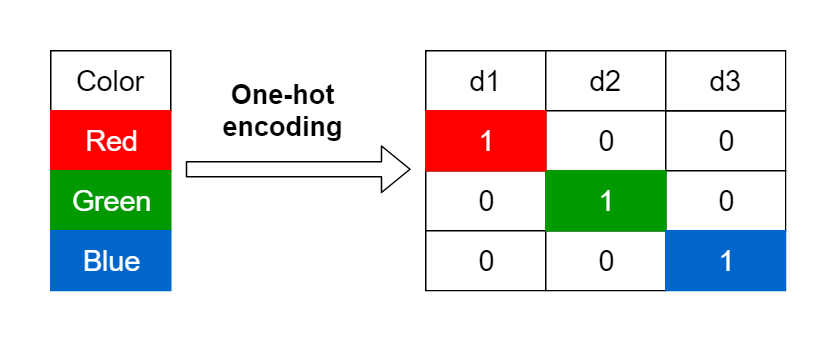
</div>


In [127]:
Y_test=np.array(Y_test).reshape(Y_test.shape[0],1)
Y_train=np.array(Y_train).reshape(Y_train.shape[0],1)

ohe = OneHotEncoder()
Y_train = ohe.fit_transform(Y_train).toarray()
Y_test = ohe.fit_transform(Y_test).toarray()

### Model de réseaux de neuronnes avec tensorflow

<div>
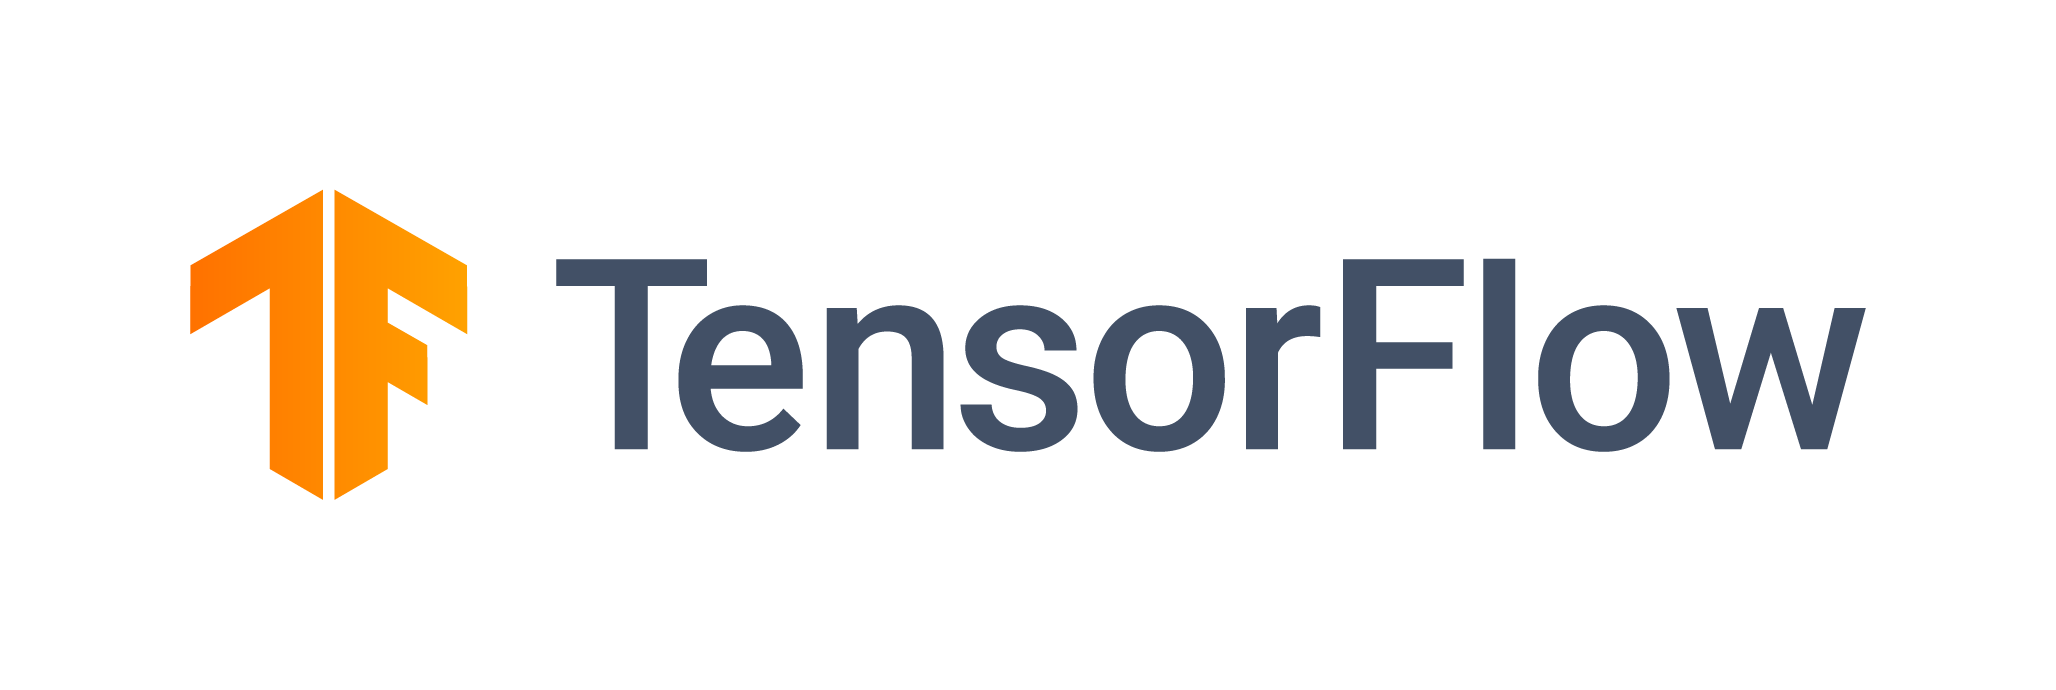
</div>


TensorFlow fonctionne sur des tableaux multidimensionnels ou des tenseurs représentés sous forme d'objets tf.Tensor

TensorFlow implémente des opérations mathématiques standard sur les tenseurs, ainsi que de nombreuses opérations spécialisées pour l'apprentissage automatique.

<div>
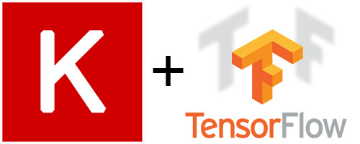
</div>


Keras est une API de réseau de neurones écrite en langage Python.

Le Modèle est le coeur de la structure de données de Keras. Il en existe deux principaux types : le modèle Séquentiel et la classe Model utilisée avec l’API fonctionnelle.

--> Ici on utilise le modele séquentiel, qui est une pile linéaire de couches. Pourquoi ? Car d'après les sources, le mode séquentiel est à privilégier car c’est le plus simple. Il est parfaitement adapté à la majorité des cas.

Le modèle doit savoir quelle forme d’entrée il doit attendre. C’est la raison pour laquelle la première couche d’un modèle séquentiel doit recevoir (optionellement) les caractéristiques de la forme d’entrée.

--> Nous précisons donc en entrée notre 'input_dim'=8 (Car ici nous utilisons les 8 variables les plus corrélées avec Revenue)

On a un réseau simple, en le décrivant couche par couche.

Chaque couche est de la forme :
- modele.add(Dense(nb_neurones, activation=ma_fonction))
- Une couche de type Dense =  chaque neurone de la nouvelle couche est connecté à toutes les sorties des neurones de la couche précédente.

A quoi sert la fonction d'activation : sert a ce que les neuronnes d’un modèle de Deep Learning 
appliquent une transformation aux données qu’ils reçoivent en entrée avant de les envoyés a la couche suivante

<div>
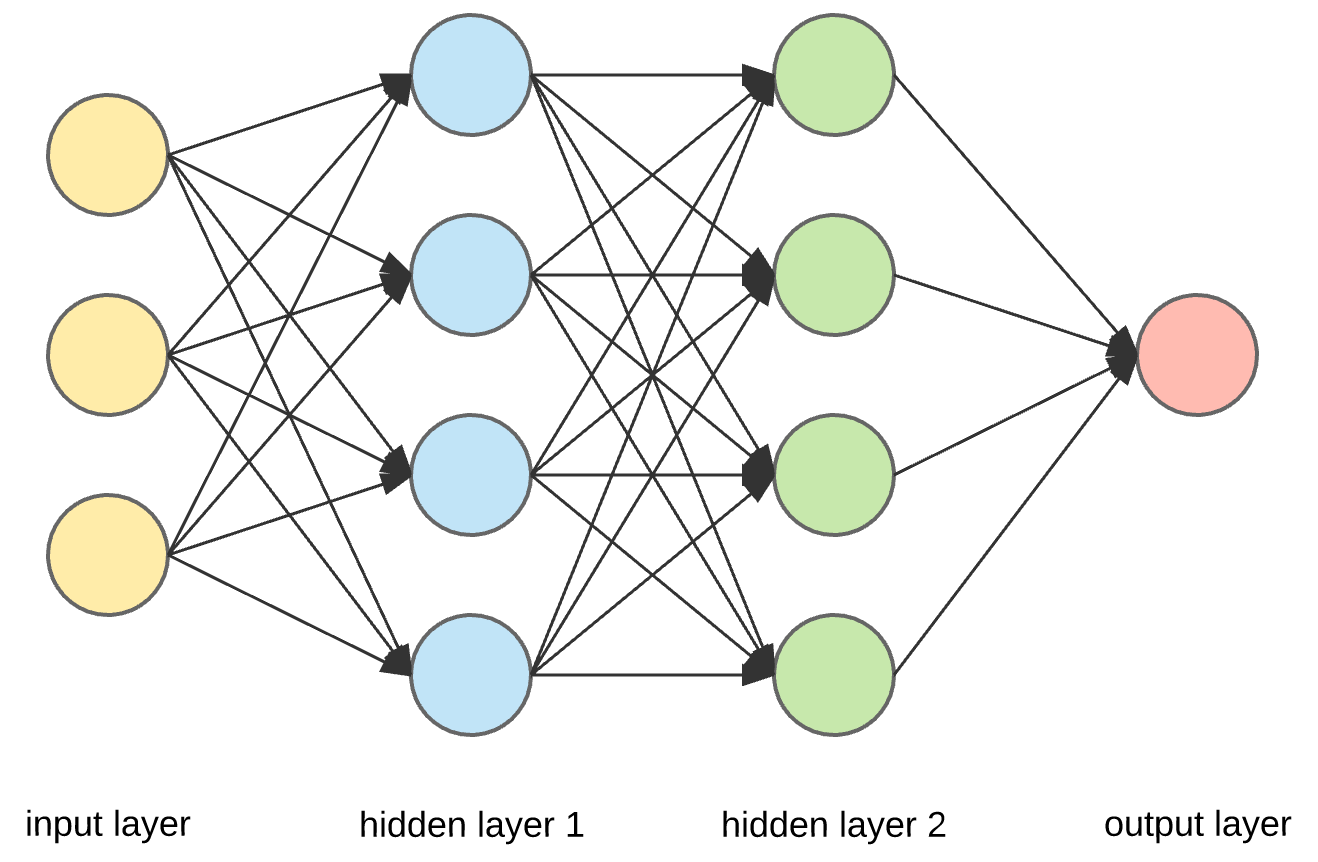
</div>


- L'exemple du model ci-dessus possède une première couche de 3 variables d'entrées (input), une couche de 4 neuronnes, puis une autre couche de 4 neuronnes, et une couche de sortie

Tous les neuronnes d'entrées sont connectés à tous les neuronnes de sorties

On utilisera nous la fonction 'relu' dans les couches ('Rectified Linear Unit') : fonction linaire qui sort l'entrée directement si elle est positive, et sort 0 sinon. C'est devenue la fonction par défaut d'activation et une des plus efficaces aujourd'hui. 

##### Pour compiler le modele, on va utiliser la loss fonction binairy_crossentropy et l'otpimiseur Adam : efficient stochastic gradient descent

### Construction de notre meilleur modèle

- Ici nous avons construit un model efficace et fonctionnel en 3 couches de calculs (couche d'entrée qui en possède 1 cachée)
- Il utilise les fonctions Relu pour les 2 couches intermédiaires
- L'optimiseur Adam : une méthode d’optimisation (ici une extension de la descente de gradient)
- loss binaire crossentropy : determine l'error entre notre sortie et notre target, ici Fonction la plus connue, définissant comme mesure de la différence entre deux probabilité de distribution pour une variable prise aléatoirement.
- On a passé la fonction de sortie en "sigmoide", qui va assurer que la couche de sortie soit une probabilité entre 0 et 1.

In [128]:
deepmodel = keras.Sequential(
    [
        layers.Dense(units=8, input_dim=8, activation="relu", name="layer1"),
        layers.Dense(units=32, activation="relu", name="layer2"),
        layers.Dense(units=2, activation="sigmoid", name="layer3"),
    ]
)

deepmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [129]:
deepmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 8)                 72        
                                                                 
 layer2 (Dense)              (None, 32)                288       
                                                                 
 layer3 (Dense)              (None, 2)                 66        
                                                                 
Total params: 426
Trainable params: 426
Non-trainable params: 0
_________________________________________________________________


- Training de notre model

In [130]:
save = deepmodel.fit(X_train,Y_train,epochs=100, validation_data =(X_test,Y_test))

Epoch 1/100
309/309 [==============================] - 1s 2ms/step - loss: 0.4066 - accuracy: 0.8364 - val_loss: 0.2797 - val_accuracy: 0.8852
Epoch 2/100
309/309 [==============================] - 0s 1ms/step - loss: 0.2599 - accuracy: 0.8868 - val_loss: 0.2608 - val_accuracy: 0.8925
Epoch 3/100
309/309 [==============================] - 0s 1ms/step - loss: 0.2500 - accuracy: 0.8913 - val_loss: 0.2532 - val_accuracy: 0.8933
Epoch 4/100
309/309 [==============================] - 0s 1ms/step - loss: 0.2445 - accuracy: 0.8934 - val_loss: 0.2480 - val_accuracy: 0.8990
Epoch 5/100
309/309 [==============================] - 0s 1ms/step - loss: 0.2415 - accuracy: 0.8972 - val_loss: 0.2457 - val_accuracy: 0.8970
Epoch 6/100
309/309 [==============================] - 0s 1ms/step - loss: 0.2389 - accuracy: 0.8967 - val_loss: 0.2417 - val_accuracy: 0.8990
Epoch 7/100
309/309 [==============================] - 0s 1ms/step - loss: 0.2378 - accuracy: 0.8989 - val_loss: 0.2402 - val_accuracy: 0.9006

Epoch 58/100
309/309 [==============================] - 0s 2ms/step - loss: 0.2257 - accuracy: 0.9033 - val_loss: 0.2320 - val_accuracy: 0.9067
Epoch 59/100
309/309 [==============================] - 0s 1ms/step - loss: 0.2262 - accuracy: 0.9051 - val_loss: 0.2311 - val_accuracy: 0.9092
Epoch 60/100
309/309 [==============================] - 0s 1ms/step - loss: 0.2261 - accuracy: 0.9039 - val_loss: 0.2307 - val_accuracy: 0.9100
Epoch 61/100
309/309 [==============================] - 0s 2ms/step - loss: 0.2260 - accuracy: 0.9033 - val_loss: 0.2309 - val_accuracy: 0.9075
Epoch 62/100
309/309 [==============================] - 0s 2ms/step - loss: 0.2258 - accuracy: 0.9044 - val_loss: 0.2308 - val_accuracy: 0.9088
Epoch 63/100
309/309 [==============================] - 0s 2ms/step - loss: 0.2258 - accuracy: 0.9045 - val_loss: 0.2298 - val_accuracy: 0.9079
Epoch 64/100
309/309 [==============================] - 0s 2ms/step - loss: 0.2257 - accuracy: 0.9035 - val_loss: 0.2304 - val_accuracy:

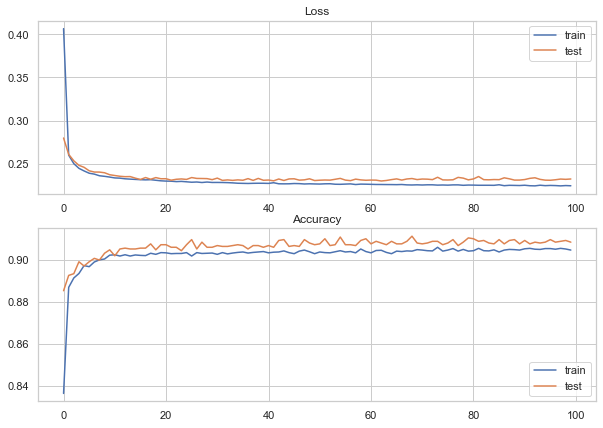

In [131]:
plt.rcParams['figure.figsize'] = (10,7)
plt.subplot(211)
plt.title('Loss')
plt.plot(save.history['loss'],label='train')
plt.plot(save.history['val_loss'],label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(save.history['accuracy'],label='train')
plt.plot(save.history['val_accuracy'],label='test')
plt.legend()
plt.show()

- Verification de notre model sur notre test set

on peut np.argmax notre prediction car on a [proba0 proba1] et argmax nous donne l'index du plus grande nombre, donc finalement nous donne soit 0 soit 1 selon la proba la plus forte

In [132]:
y_pred = deepmodel.predict(X_test)

predi = list()
for i in range(len(y_pred)):
    predi.append(np.argmax(y_pred[i]))

test = list()
for i in range(len(Y_test)):
    test.append(np.argmax(Y_test[i]))

78/78 [==============================] - 0s 891us/step


In [133]:
from sklearn.metrics import accuracy_score
a = accuracy_score(predi,test)
print('Précision de notre modèle :', a*100)

Précision de notre modèle : 90.8353609083536


In [134]:
resuDeep = deepmodel.evaluate(X_test, Y_test, batch_size=128)

20/20 [==============================] - 0s 1ms/step - loss: 0.2322 - accuracy: 0.9084


- Matrice de confusion

In [135]:
y_test_arg=np.argmax(Y_test,axis=1)
Y_predd = np.argmax(deepmodel.predict(X_test),axis=1)
print('Confusion Matrix')
cmdeep = confusion_matrix(y_test_arg, Y_predd)
print(cmdeep)

78/78 [==============================] - 0s 879us/step
Confusion Matrix
[[2019   72]
 [ 154  221]]


- Score F1 de notre model de deep

In [136]:
f1scoreDeep = f1_score(y_test_arg, Y_predd, average='weighted')
print('F1 score de : ',f1scoreDeep)

F1 score de :  0.9036098213455177


### Nous allons maintenant tester avec quasiment tout le dataset et vous expliquer pourquoi ce serait de l'overfitting

In [137]:
sc1=StandardScaler()
deepp = shopset.drop(['Revenue','Month','VisitorType',
                    'info','Other'], axis = 1)
deepp = deepp.join(shopset["Revenue"])
XX = deepp.iloc[:,:30].values
YY = deepp.iloc[:,30:31].values
YY = ohe.fit_transform(YY).toarray()
XX = sc1.fit_transform(XX)
XX_train,XX_test,yy_train,yy_test = train_test_split(XX,YY,test_size = 0.2)

In [138]:
XX.shape

(12329, 30)

In [139]:
deepmodel2 = keras.Sequential(
    [
        layers.Dense(units=31, input_dim=30, activation="relu", name="layer1"),
        layers.Dense(units=64, activation="relu", name="layer2"),
        layers.Dense(units=2, activation="sigmoid", name="layer3"),
    ]
)


deepmodel2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deepmodel2.summary()
save2 = deepmodel2.fit(XX_train,yy_train,epochs=100, validation_data =(XX_test,yy_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 31)                961       
                                                                 
 layer2 (Dense)              (None, 64)                2048      
                                                                 
 layer3 (Dense)              (None, 2)                 130       
                                                                 
Total params: 3,139
Trainable params: 3,139
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
309/309 [==============================] - 1s 2ms/step - loss: 0.3304 - accuracy: 0.8654 - val_loss: 0.2470 - val_accuracy: 0.8994
Epoch 2/100
309/309 [==============================] - 1s 2ms/step - loss: 0.2398 - accuracy: 0.8957 - val_loss: 0.2336 - val_accuracy: 0.9051
Epoch 3/100
309/309 [=========

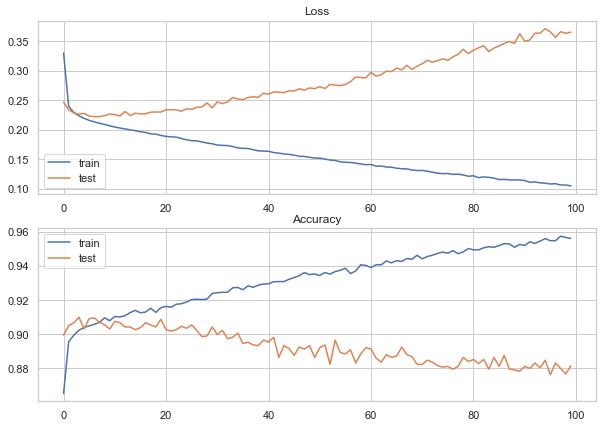

In [140]:
plt.rcParams['figure.figsize'] = (10,7)
plt.subplot(211)
plt.title('Loss')
plt.plot(save2.history['loss'],label='train')
plt.plot(save2.history['val_loss'],label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(save2.history['accuracy'],label='train')
plt.plot(save2.history['val_accuracy'],label='test')
plt.legend()
plt.show()

### On voit que la loss augmente sur le test, et que l'accuracy décroit / stagne au fil du temps

In [141]:
y_pred2 = deepmodel2.predict(XX_test)

predi2 = list()
for i in range(len(y_pred2)):
    predi2.append(np.argmax(y_pred2[i]))

test2 = list()
for i in range(len(yy_test)):
    test2.append(np.argmax(yy_test[i]))

78/78 [==============================] - 0s 846us/step


In [142]:
deepScoreTest = deepmodel2.evaluate(XX_test, yy_test, verbose=0)
print('Model avec overfit : Test loss:', deepScoreTest[0])
print('Test accuracy:', deepScoreTest[1])

deepScoree = deepmodel.evaluate(X_test, Y_test, verbose=0)
print('Model sans overfit : Test loss:', deepScoree[0])
print('Test accuracy:', deepScoree[1])

Model avec overfit : Test loss: 0.36569249629974365
Test accuracy: 0.8815895915031433
Model sans overfit : Test loss: 0.2321678102016449
Test accuracy: 0.9083536267280579


In [143]:
b = accuracy_score(predi2,test2)
print('Précision de notre prédiction :', b*100)

Précision de notre prédiction : 88.15896188158962


#### On remarque que l'on a une accuracy sur le training de 0.96, donc supérieur à notre précédent modèle, cependant notre 'val_accuracy' est autour de 0.87. 

#### C'est pourquoi, avec le second model qui contient plus de variables, notre prédiction sur le test set est a 88.9% : C'est de l'overfitting
##### Solutions essayées : shuffle les données, changer les paramètres

## Conclusion sur le DeepLearning

In [144]:
donnees = {'MSE': [None], 'MAE': [None], 'Jacc_score0': [None], 'Jacc_score1': [None],
          'F1':[f1scoreDeep]}  
  
resul = pd.DataFrame(donnees, index =['DeepLearning'])
resul

,MSE,MAE,Jacc_score0,Jacc_score1,F1
DeepLearning,None,None,None,None,0.90361


In [145]:
modeleDF2 = modeleDF.append(resul)
modeleDF2.sort_values(by=['F1'],ascending = False)

,MSE,MAE,R2,Jacc_score0,Jacc_score1,F1
DeepLearning,NaN,NaN,NaN,NaN,NaN,0.90361
Random Forest,0.09,0.09,0.26,0.90,0.48,0.90006
SVC,0.10,0.10,0.25,0.89,0.48,0.89885
KNN_Class,0.10,0.10,0.24,0.89,0.46,0.89656
Logistic_regression,0.10,0.10,0.24,0.89,0.46,0.89635
XGBoost,0.10,0.10,0.24,0.89,0.46,0.89571
Decision_tree,0.10,0.10,0.19,0.89,0.43,0.88808
GaussianNB_Class,0.12,0.12,0.06,0.87,0.41,0.87658


### API

In [146]:
#On teste sur cette ligne (prealablement retirée du dataset)
print("liste :",row[:-1],"\nresult :",row[-1])

liste : [0.0, 0.0, 0.030769231, 26.0, 0.0, 2021.4, 0.007692308, 0.0] 
result : 0.0


In [147]:
from flask import Flask, request, render_template
from werkzeug.wrappers import Request, Response
from werkzeug.serving import run_simple

#Mettre dans best le nom du meilleur modele
dico_result = {"KNN":modeleDF2["F1"]["KNN_Class"],"NB":modeleDF2["F1"]["GaussianNB_Class"],"SVC":modeleDF2["F1"]["SVC"],"TREE":modeleDF2["F1"]["Decision_tree"],"LR":modeleDF2["F1"]["Logistic_regression"],"XGB":modeleDF2["F1"]["XGBoost"],"RF":modeleDF2["F1"]["Random Forest"], "DEEP":modeleDF2["F1"]["DeepLearning"]}
best = max(dico_result, key=dico_result.get)

app = Flask(__name__)

#exemple :
#http://localhost:9000/?mod=KNN&pvBool=1&pv=1&exiRa=1&prodRel=1&nov=1&prodRelDur=1&bounRa=1&admi=1
#http://localhost:9000/?mod=ALL&li=[0.0, 0.0, 0.2, 2.0, 0.0, 0.0, 0.2, 0.0] 

@app.route("/", methods=['GET'])
def prediction():
    #recuperation des valeurs de l'individu
    model = request.args.get('mod', default=best) #model used to predict, the best model is used by default
    pvBool = request.args.get('pvBool', default=0)
    pv = request.args.get('pv', default=X1["PageValues"].mean())
    exiRa = request.args.get('exiRa', default=X1["ExitRates"].mean())
    prodRel = request.args.get('prodRel', default=X1["ProductRelated"].mean())
    nov = request.args.get('nov', default=0)
    prodRelDur = request.args.get('prodRelDur', default=X1["ProductRelated_Duration"].mean())
    bounRa = request.args.get('bounRa', default=X1["BounceRates"].mean())
    admi = request.args.get('admi', default=X1["admin"].mean())
    liste = request.args.get('li', default='no list')
    
    #recuperation de la liste
    if liste == 'no list' :
        liste = [pvBool, pv, exiRa, prodRel, nov, prodRelDur, bounRa, admi]
    else :
        liste = [str(x).strip(' %') for x in eval(liste)]
        liste = [float(i) for i in liste]

    #normalisation par rapport aux valeurs du train
    array = np.array([liste])
    ar_std = X_fit.transform(array)
    
    #On applique le modele
    if model == 'KNN' :
        result = str(modelKNN.predict(ar_std))
    elif model == 'NB':
        result = str(modelNB.predict(ar_std))
    elif model == 'SVM':
        result = str(modelSVM.predict(ar_std))
    elif model == 'TREE':
        result = str(modelTREE.predict(ar_std))
    elif model == 'LR':
        result = str(modelLR.predict(ar_std))
    elif model == 'XGB':
        result = str(modelXGB.predict(ar_std))
    elif model == 'RF':
        result = str(modelRF.predict(ar_std))
    elif model == 'DEEP':
        result = str(deepmodel.predict(ar_std))
    elif model == 'ALL':
        result = "Voici les prédictions des différents modèles :"
        result+= "\nK-Nearest Neighbors -> " + str(modelKNN.predict(ar_std))
        result+= "\nGaussian Naive Bayes -> " + str(modelNB.predict(ar_std))
        result+= "\nSupport Vector Classification -> " + str(modelSVM.predict(ar_std))
        result+= "\nDecision Tree -> " + str(modelTREE.predict(ar_std))
        result+= "\nLogistic Regression -> " + str(modelLR.predict(ar_std))
        result+= "\nXGBoost -> " + str(modelXGB.predict(ar_std))
        result+= "\nRandom Forest -> " + str(modelRF.predict(ar_std))
        result+= "\nDeep Learning -> " + str(deepmodel.predict(ar_std))

    return result

if __name__ == "__main__":
    run_simple('localhost', 9000, app)

 * Running on http://localhost:9000/ (Press CTRL+C to quit)
